In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels as sm
import matplotlib.pyplot as plt
from datetime import datetime
import ast
import seaborn as sns
from collections import Counter
import statsmodels.api as sm

pd.set_option('display.max_rows', None)

#Questions we wanted to answer:

Three City Comparison:

How do price distributions vary?

How does the share of single-property to multiple-property hosts vary?

How does average home price in a neighborhood correlate with the average AirBNB price in a neighborhood?

What amenities appear in top-rated properties?

How do property attributes correlate with each other?

What are the top-rated neighborhoods?

Washington DC Exploration:

How does a host living in DC fare against one who doesn’t live on site?

Why is one neighborhood particularly expensive?

Factors that affect Airbnb Ratings

Factors that affect Airbnb Prices Optimizations - What words resonate better with customers?



#Conclusions to our questions:
Three City Comparison:

Prices tend to cluster between 50 dollars and 150 dollars for each city. Each city has a right skew with a long tail. Prices begin to have major variation past the 500 dollar mark and were added into their own bin. Los Angeles has a greater share of these ‘premium’ properties than the other two cities.

The distribution of host categories by city is fairly consistent, with single-property owners making up over 70% for each city.


The vast majority of AirBNB hosts have 10 properties or fewer.
The relationship in a neighborhood between average home price and average AirBNB rental price is positive as expected, but relatively modest.
Chicago has no outliers, while New York and Los Angeles have many due to their extremely competitive real estate markets.


Top-rated apartments ensure safety (smoke and carbon monoxide alarms), essentials (kitchens, hot water, towels), and comfort (hangers, hair dryers). Wi-Fi stands out in Los Angeles, reflecting regional preferences.


Guest ratings show minimal correlation with measurable factors like price or availability but are slightly influenced by superhost status, perhaps demonstrating the importance of host quality over listing characteristics.
While price, size, availability of host, and superhost status are relevant factors for LA, price is not a significant factor in Chicago. In NY, neither price nor size are significant factors. These differences suggest that users may have different preferences and expectations for places at which they are staying according to the city where they get an Airbnb.


Highly-rated neighborhoods tend to be quieter, less tourist-heavy areas, suggesting guests value personalized experiences and tranquil environments over central locations. Host quality appears to be a key factor driving ratings, especially in areas with fewer listings.

Washington DC Exploration:

MIA Hosts’ Listings perform generally worse.

While prices fair between 200-300 USD for most neighbourhoods, but, one stands out. Curiously, we learnt why!

People respond more to Accuracy in descriptions, Value of Money, Cleanliness.

People respond lesser to
Location, Communication

Price = f   {neighbourhood,
property type,
superhost status,
verified host,
active host,
beds,
number of reviews}

We found that most titles included: Locational information, Apartment Design information, Closeness to Capitol Area

We found that most common descriptions included:
Bedroom information, Locational information, Closest Street, DC Area, Metro Connectivity




Read in Chicago AirBNB data

In [278]:
chicago_listings = pd.read_csv('chicago_listings.csv')

In [279]:
chicago_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,16757056.000,https://www.airbnb.com/rooms/16757056,20240600000000.000,6/21/2024,city scrape,Heart of Chicago 2BD + Parking,Comfortably fits 5. Two private bedrooms and a...,Pilsen is a very family oriented neighborhood ...,https://a0.muscache.com/pictures/bedab4f0-0e4e...,32137398,...,4.950,4.650,4.850,R23000097172,f,1,1,0,0,2.410
1,48112045.000,https://www.airbnb.com/rooms/48112045,20240600000000.000,6/21/2024,city scrape,West Town Chicago Apt near Metra and United Ce...,Welcome to your dream vacation in a recently r...,"Located in West Town/Ukrainian Village, Super ...",https://a0.muscache.com/pictures/391a5e70-1adb...,17251828,...,4.760,4.770,4.510,R21000061412,f,1,1,0,0,1.740
2,1089960000000000000.000,https://www.airbnb.com/rooms/1089958767588000931,20240600000000.000,6/21/2024,city scrape,Nice 2bd 1ba w/ gated entrance!,Great 2bd 1ba with a gated entrance less than ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,487981983,...,5.000,5.000,5.000,R22000093747,t,6,6,0,0,0.310
3,24694181.000,https://www.airbnb.com/rooms/24694181,20240600000000.000,6/21/2024,city scrape,Talman Ave,The unit has four rooms available to the guest...,NaN,https://a0.muscache.com/pictures/ce3da2d6-3fd1...,15721250,...,4.950,4.880,4.880,R19000042335,f,1,1,0,0,0.580
4,639920000000000000.000,https://www.airbnb.com/rooms/639920368906600737,20240600000000.000,6/21/2024,city scrape,Historic brownstone in the heart of Old Town!,You will be close to everything when you stay ...,NaN,https://a0.muscache.com/pictures/3f5fe48b-9aac...,37736852,...,5.000,5.000,4.670,R22000087331,f,1,1,0,0,0.460


Observe datatypes for Chicago columns

In [280]:
chicago_listings.dtypes

id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

Observe amount of nulls in Chicago data

In [281]:
chicago_listings.isna()
np.sum(chicago_listings.isna())

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      204
neighborhood_overview                           2560
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1423
host_about                                      2597
host_response_time                               334
host_response_rate                               334
host_acceptance_rate                             306
host_is_superhost                             

Evaluate columns for immaterial attributes such as urls and unusable cells. Drop those columns.

In [282]:
immaterial = ['listing_url','scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url',
              'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 'neighbourhood_group_cleansed',
              'calendar_updated','has_availability', 'calendar_last_scraped']

In [283]:
chicago_listings = chicago_listings.drop(columns = immaterial)

Drop rows that don't have a value in their price column.

In [284]:
chicago_listings = chicago_listings.dropna(subset = 'price')

Evaluate value counts for host_id to see how many properties each host has in Chicago. Put into a dataframe. Evaluate shape.

In [285]:
chicago_hosts = pd.DataFrame(chicago_listings['host_id'].value_counts(), columns = ['count'])
print(chicago_hosts.shape[0])

3347


Put host_id count into a column called host_category where it is binned according to number of properties hosted.

In [286]:
chicago_hosts['host_category'] = pd.cut(chicago_hosts['count'], bins = [0,1,10,50,1000], labels = ['Single', '1-10', '10-50', '50+'])
chicago_hosts

,count,host_category
host_id,,
107434423,490,50+
446820235,108,50+
248760412,74,50+
395498979,67,50+
177188450,58,50+
3965428,55,50+
391945218,53,50+
435105119,43,10-50
243035563,39,10-50


Create new dataframe for Chicago neighborhoods where each neighborhood has a count of properties within it.

In [287]:
chicago_neighborhoods = pd.DataFrame(chicago_listings['neighbourhood_cleansed'].value_counts(), columns = ['count'])
chicago_neighborhoods

,count
neighbourhood_cleansed,
Near North Side,879
West Town,700
Lake View,561
Near West Side,513
Logan Square,441
Loop,440
Lincoln Park,267
Near South Side,237
Lower West Side,191


Use regex to modify price to be numeric.

In [288]:
chicago_listings['price'] = chicago_listings['price'].str.replace('[$,]', '', regex=True)
chicago_listings['price'] = pd.to_numeric(chicago_listings['price'])

Calculate mean price for rental by neighborhood.

In [289]:
chicago_price = chicago_listings.groupby('neighbourhood_cleansed')['price'].mean()
chicago_price.to_frame()

,price
neighbourhood_cleansed,
Albany Park,141.692
Archer Heights,85.000
Armour Square,168.210
Ashburn,179.500
Auburn Gresham,149.417
Austin,171.000
Avalon Park,170.000
Avondale,159.338
Belmont Cragin,185.675


Merge mean price data into the Chicago neighborhoods dataframe.

In [290]:
chicago_neighborhoods = pd.merge(chicago_neighborhoods, chicago_price, on = 'neighbourhood_cleansed', how = 'inner')
chicago_neighborhoods

,count,price
neighbourhood_cleansed,,
Near North Side,879,355.829
West Town,700,297.586
Lake View,561,259.492
Near West Side,513,248.807
Logan Square,441,197.846
Loop,440,329.757
Lincoln Park,267,286.723
Near South Side,237,286.076
Lower West Side,191,146.743


Read in data from Zillow about average home price by neighborhood. Modify column names and drop immaterial columns.

In [291]:
chicago_zillow = pd.read_csv('chicago_neighborhoods_zillow.csv')

In [292]:
chicago_zillow.rename(columns = {'10/31/2024': 'avg_price', 'RegionName':'neighbourhood_cleansed'}, inplace = True)

In [293]:
chicago_zillow.drop(['RegionID','SizeRank','RegionType','StateName', 'State', 'City', 'Metro', 'CountyName'], axis = 1, inplace=True)

Merge average home price data into Chicago neighborhoods dataframe.

In [294]:
chicago_neighborhoods = pd.merge(chicago_neighborhoods, chicago_zillow, on = 'neighbourhood_cleansed', how = 'inner')
chicago_neighborhoods

,neighbourhood_cleansed,count,price,avg_price
0,West Town,700,297.586,"502,265.99"
1,Lake View,561,259.492,"377,836.12"
2,Near West Side,513,248.807,"395,857.98"
3,Logan Square,441,197.846,"470,973.73"
4,Lincoln Park,267,286.723,"556,210.81"
5,Bridgeport,173,112.659,"400,765.21"
6,Uptown,165,180.527,"297,188.97"
7,Irving Park,161,151.764,"407,783.45"
8,Rogers Park,158,148.006,"235,195.44"
9,Edgewater,155,171.613,"246,922.73"


Complete all previous steps for Los Angeles.

In [295]:
la_listings = pd.read_csv('losangeles_listings.csv')
la_listings = la_listings.drop(columns = immaterial)
la_listings = la_listings.dropna(subset = 'price')
la_hosts = pd.DataFrame(la_listings['host_id'].value_counts(), columns = ['count'])
la_hosts['host_category'] = pd.cut(la_hosts['count'], bins = [0,1,10,50,1000], labels = ['Single', '1-10', '10-50', '50+'])
la_neighborhoods = pd.DataFrame(la_listings['neighbourhood_cleansed'].value_counts(), columns = ['count'])
la_price = la_listings.groupby('neighbourhood_cleansed')['price'].mean()
la_price.to_frame()
la_neighborhoods = pd.merge(la_neighborhoods, la_price, on = 'neighbourhood_cleansed', how = 'inner')
la_zillow = pd.read_csv('la_neighborhoods_zillow.csv')
la_zillow.rename(columns = {'10/31/2024': 'avg_price', 'RegionName':'neighbourhood_cleansed'}, inplace = True)
la_zillow.drop(['RegionID','SizeRank','RegionType','StateName', 'State', 'City', 'Metro', 'CountyName'], axis = 1, inplace=True)
la_neighborhoods = pd.merge(la_neighborhoods, la_zillow, on = 'neighbourhood_cleansed', how = 'inner')

Complete all previous steps for New York.

In [296]:
ny_listings = pd.read_csv('newyork_listings.csv')
ny_listings = ny_listings.drop(columns = immaterial)
ny_listings = ny_listings.dropna(subset = 'price')
ny_listings['price'] = ny_listings['price'].str.replace('[$,]', '', regex=True)
ny_listings['price'] = pd.to_numeric(ny_listings['price'])
ny_hosts = pd.DataFrame(ny_listings['host_id'].value_counts(), columns = ['count'])
ny_hosts['host_category'] = pd.cut(ny_hosts['count'], bins = [0,1,10,50,1000], labels = ['Single', '1-10', '10-50', '50+'])
ny_neighborhoods = pd.DataFrame(ny_listings['neighbourhood_cleansed'].value_counts(), columns = ['count'])
ny_price = ny_listings.groupby('neighbourhood_cleansed')['price'].mean()
ny_price.to_frame()
ny_neighborhoods = pd.merge(ny_neighborhoods, ny_price, on = 'neighbourhood_cleansed', how = 'inner')
ny_zillow = pd.read_csv('ny_neighborhoods_zillow.csv')
ny_zillow.rename(columns = {'10/31/2024': 'avg_price', 'RegionName':'neighbourhood_cleansed'}, inplace = True)
ny_zillow.drop(['RegionID','SizeRank','RegionType','StateName', 'State', 'City', 'Metro', 'CountyName'], axis = 1, inplace=True)
ny_neighborhoods = pd.merge(ny_neighborhoods, ny_zillow, on = 'neighbourhood_cleansed', how = 'inner')

Combine all listings dataframes into one with price and city data.

In [297]:
chicago_listings['city'] = 'Chicago'
la_listings['city'] = 'Los Angeles'
ny_listings['city'] = 'New York'

In [298]:
all_listings = pd.concat([chicago_listings[['price','city']], la_listings[['price', 'city']], ny_listings[['price','city']]])

Bin that data according to 50 dollar increments for histogram application.

In [299]:
price_bins = [0,50,100,150,200,250,300,350,400,450,500, 100000]
all_listings['price_category'] = pd.cut(all_listings.price, bins = price_bins, ordered = True)

Develop price counts data for histogram purposes.

In [300]:
price_counts = all_listings['price_category'].value_counts().sort_index()
price_counts

price_category
(0, 50]           5185
(50, 100]        14688
(100, 150]       13783
(150, 200]       10278
(200, 250]        6269
(250, 300]        4110
(300, 350]        2817
(350, 400]        2199
(400, 450]        1448
(450, 500]        1179
(500, 100000]     5728
Name: count, dtype: int64

Create a histogram showing the price distribution by each city.

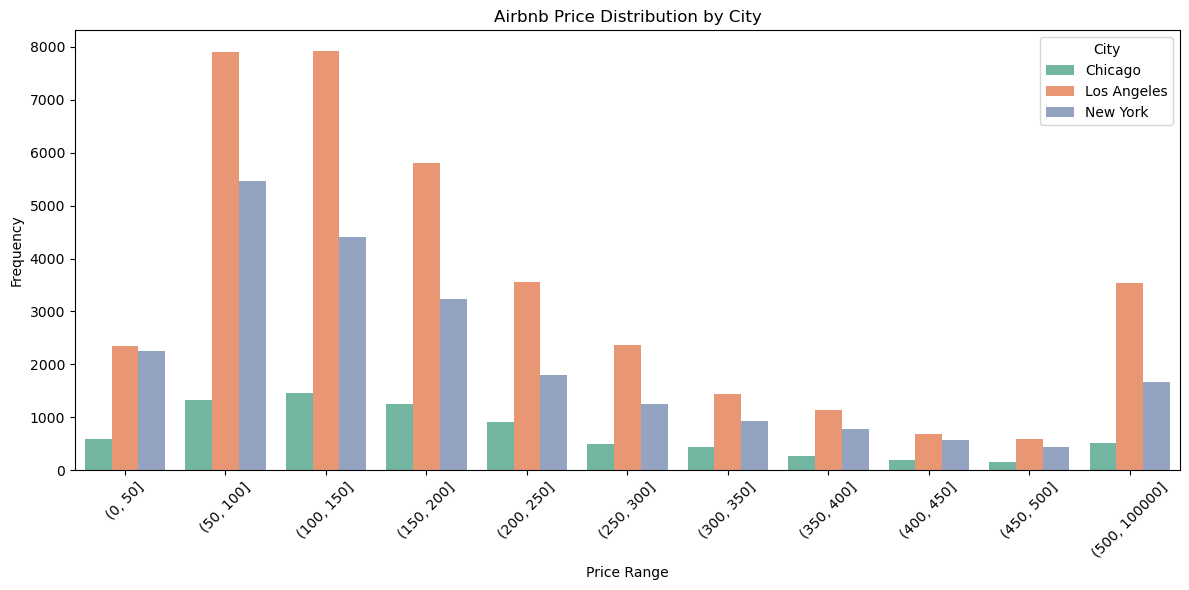

In [301]:
grouped = all_listings.groupby(['price_category', 'city']).size().reset_index(name='frequency')
grouped['price_category'] = grouped['price_category'].astype(str)
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='price_category', y='frequency', hue='city', palette = 'Set2')
plt.title('Airbnb Price Distribution by City')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()

Combine three city data for hosts into one table for bar chart purposes.

In [302]:
chicago_hosts['city'] = 'Chicago'
la_hosts['city'] = 'Los Angeles'
ny_hosts['city'] = 'New York'

In [303]:
all_hosts = pd.concat([chicago_hosts[['city', 'host_category']], la_hosts[['city', 'host_category']],ny_hosts[['city','host_category']]])

Create a stacked barchart showing the proportion of host category by city.

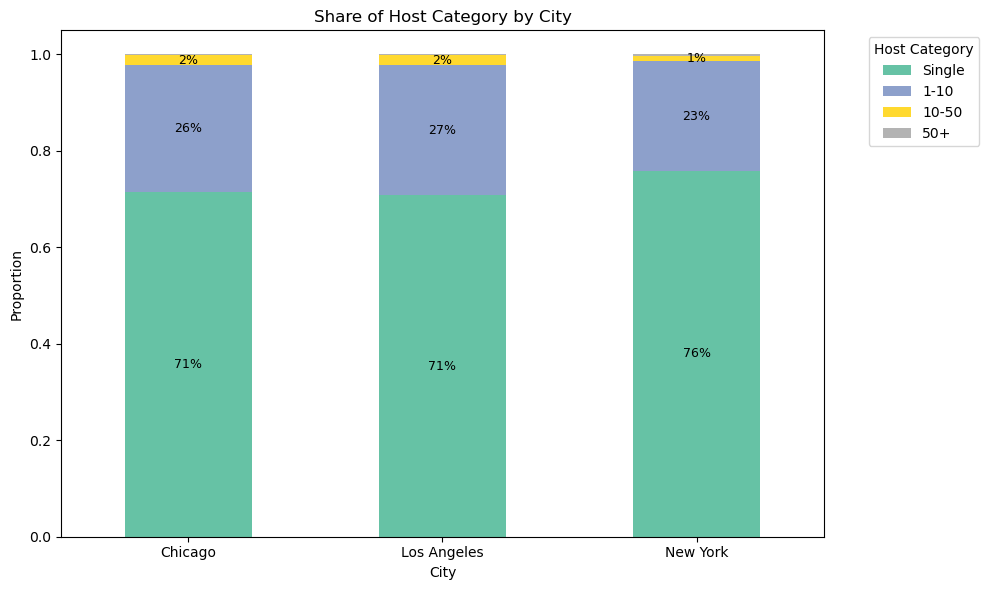

In [304]:
host_counts = all_hosts.groupby(['city', 'host_category']).size().unstack(fill_value=0)
host_proportions = host_counts.div(host_counts.sum(axis=1), axis=0)
host_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Share of Host Category by City')
plt.xlabel('City')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Host Category', bbox_to_anchor=(1.05, 1), loc='upper left')
for i, city in enumerate(host_proportions.index):
    cumulative_height = 0
    for j, category in enumerate(host_proportions.columns):
        proportion = host_proportions.loc[city, category]
        if proportion > 0.01:
            cumulative_height += proportion
            plt.text(
                i,
                cumulative_height - (proportion / 2),
                f'{proportion:.0%}',
                ha='center', va='center', fontsize=9, color='black'
            )
        else:
            cumulative_height += proportion
plt.tight_layout()
plt.show()

Combine all neighborhood data into one dataframe for scatterplot purposes. Use regex again to ensure numeric price.

In [305]:
chicago_neighborhoods['city'] = 'Chicago'
la_neighborhoods['city'] = 'Los Angeles'
ny_neighborhoods['city'] = 'New York'

In [306]:
all_neighborhoods = pd.concat([chicago_neighborhoods[['city','price', 'avg_price']], la_neighborhoods[['city','price', 'avg_price']], ny_neighborhoods[['city','price', 'avg_price']]])

In [307]:
all_neighborhoods['avg_price'] = all_neighborhoods['avg_price'].replace({',': ''}, regex=True)
all_neighborhoods['avg_price'] = pd.to_numeric(all_neighborhoods['avg_price'])

In [308]:
correlations_by_city = all_neighborhoods.groupby('city').apply(
    lambda group: group[['price', 'avg_price']].corr(method='pearson').iloc[0, 1]
)
correlations_by_city

city
Chicago       0.473
Los Angeles   0.723
New York      0.602
dtype: float64

Create a scatterplot showing the correlation between average Zillow home price by neighborhood and average AirBNB rental price by neighborhood.

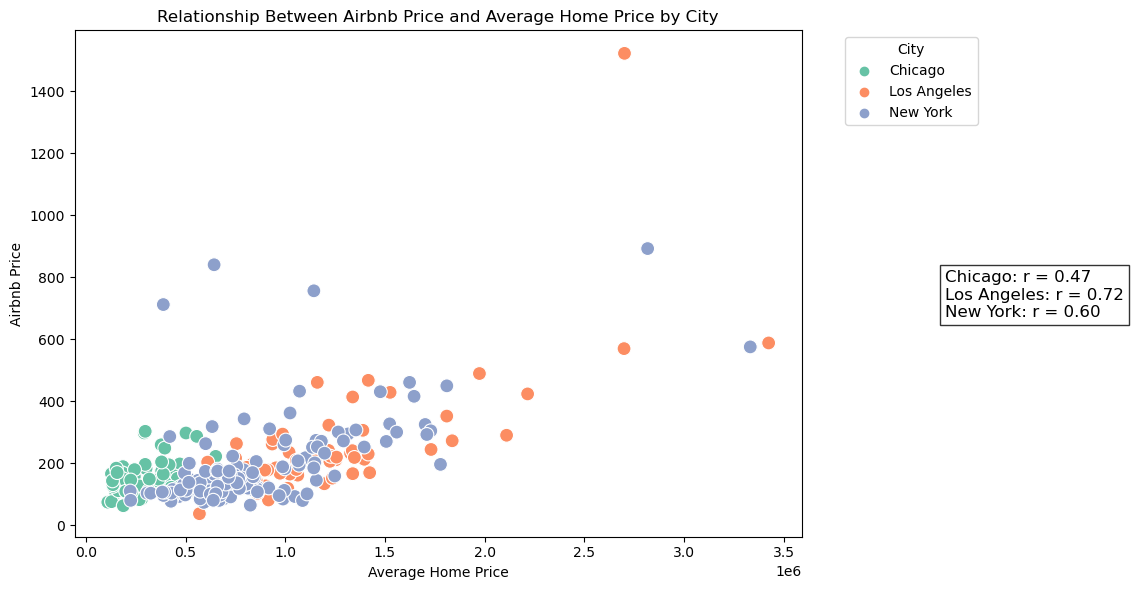

In [309]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_price', y='price', hue='city', data=all_neighborhoods, palette='Set2', s=100, marker='o')
correlation_text = "\n".join([f"{city}: r = {corr:.2f}" for city, corr in correlations_by_city.items()])
plt.gcf().text(0.95, 0.5, correlation_text, fontsize=12, va='center', bbox=dict(facecolor='white', alpha=0.8))
plt.title('Relationship Between Airbnb Price and Average Home Price by City')
plt.xlabel('Average Home Price')
plt.ylabel('Airbnb Price')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Exploratory section for three city analysis

In [310]:
chicago_listings['host_id'].value_counts().head(5)

host_id
107434423    490
446820235    108
248760412     74
395498979     67
177188450     58
Name: count, dtype: int64

In [311]:
chicago_listings['host_location'].value_counts().head(5)

host_location
Chicago, IL                    5014
New York, NY                    504
Dubai, United Arab Emirates     109
United States                    68
Skokie, IL                       40
Name: count, dtype: int64

In [312]:
chicago_listings['host_response_time'].value_counts()

host_response_time
within an hour        6174
within a few hours     626
within a day           306
a few days or more     177
Name: count, dtype: int64

In [313]:
chicago_listings['host_is_superhost'] = chicago_listings['host_is_superhost'].map({'f': False, 't': True})
chicago_listings['host_is_superhost'].value_counts()

host_is_superhost
False    3983
True     3436
Name: count, dtype: int64

In [314]:
chicago_listings['host_neighbourhood'].value_counts().head(5)

host_neighbourhood
Cambridge          490
Logan Square       366
West Town          346
River North        285
Near South Side    198
Name: count, dtype: int64

In [315]:
chicago_listings['host_verifications'].value_counts()

host_verifications
['email', 'phone']                  5573
['email', 'phone', 'work_email']    1472
['phone']                            501
['phone', 'work_email']               48
['email']                              4
Name: count, dtype: int64

In [316]:
chicago_listings['property_type'].value_counts()

property_type
Entire rental unit                    4000
Entire condo                           684
Entire home                            648
Private room in rental unit            602
Private room in home                   464
Entire serviced apartment              214
Room in hotel                          163
Entire guest suite                     132
Private room in condo                  116
Entire townhouse                        97
Entire loft                             66
Private room in townhouse               58
Room in boutique hotel                  56
Private room in bed and breakfast       54
Entire guesthouse                       45
Shared room in home                     31
Shared room in rental unit              22
Private room in bungalow                21
Private room in loft                    18
Private room in guest suite             17
Entire bungalow                         13
Room in bed and breakfast                9
Entire vacation home                    

In [317]:
chicago_listings['price'].value_counts().head(5)

price
150.000    87
120.000    78
332.000    76
100.000    69
250.000    63
Name: count, dtype: int64

In [318]:
chicago_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Near North Side          355.829
Loop                     329.757
Mount Greenwood          303.000
Clearing                 297.889
West Town                297.586
Lincoln Park             286.723
Near South Side          286.076
Lake View                259.492
Near West Side           248.807
North Center             222.217
Grand Boulevard          218.517
Douglas                  209.787
Oakland                  204.375
Logan Square             197.846
Hermosa                  196.360
Beverly                  195.000
Chatham                  189.179
Belmont Cragin           185.675
Burnside                 184.250
Dunning                  182.647
Uptown                   180.527
Ashburn                  179.500
Humboldt Park            175.418
Ohare                    172.714
Edgewater                171.613
Austin                   171.000
Avalon Park              170.000
Calumet Heights          168.500
Armour Square            168.210
Greater Grand Crossi

In [319]:
chicago_listings['neighbourhood_cleansed'].unique()

array(['Lower West Side', 'West Town', 'Near West Side', 'Lincoln Square',
       'Lincoln Park', 'Lake View', 'Near North Side', 'Near South Side',
       'Loop', 'Edgewater', 'South Shore', 'East Garfield Park',
       'North Center', 'Bridgeport', 'New City', 'East Side',
       'Irving Park', 'Grand Boulevard', 'Austin', 'Albany Park',
       'Portage Park', 'Woodlawn', 'Kenwood', 'Calumet Heights',
       'Hyde Park', 'Humboldt Park', 'Chatham', 'West Ridge', 'Avondale',
       'Logan Square', 'Douglas', 'Uptown', 'Armour Square',
       'South Lawndale', 'Greater Grand Crossing', 'North Lawndale',
       'Clearing', 'Norwood Park', 'Dunning', 'Rogers Park',
       'Forest Glen', 'Washington Park', 'Jefferson Park',
       'Mckinley Park', 'Ohare', 'Morgan Park', 'Pullman', 'West Pullman',
       'Belmont Cragin', 'Roseland', 'Beverly', 'Washington Heights',
       'South Deering', 'Brighton Park', 'West Garfield Park',
       'West Lawn', 'South Chicago', 'Englewood', 'Hermosa',


End of Exploratory data section

                       Count
Smoke alarm             2619
Carbon monoxide alarm   2538
Kitchen                 2485
Hot water               2421
Essentials              2396
Hair dryer              2370
Iron                    2341
Hangers                 2329
Dishes and silverware   2288
Cooking basics          2285


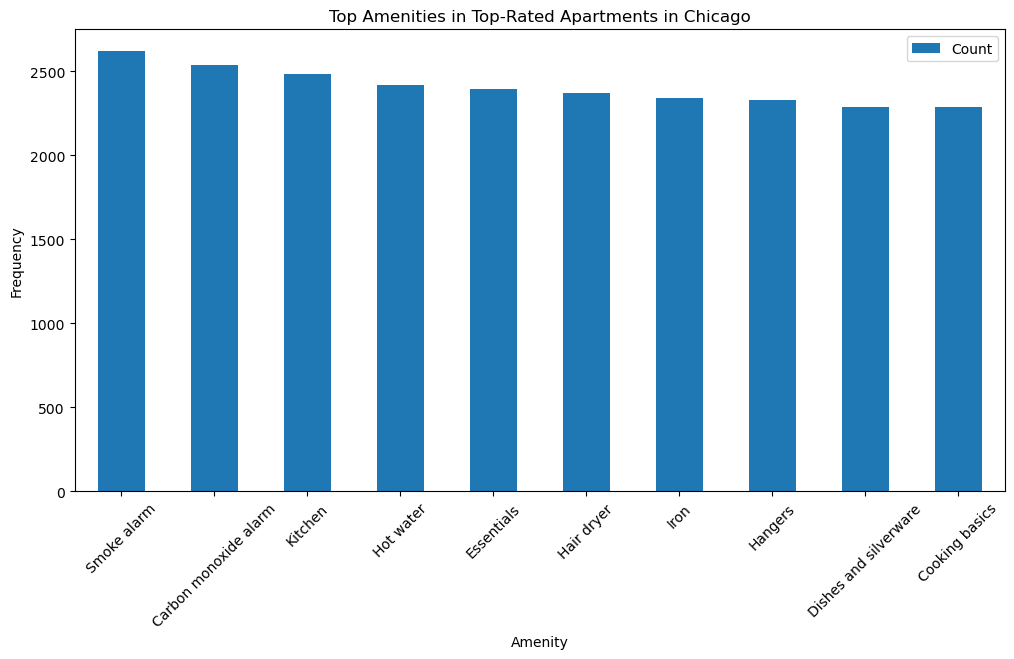

In [320]:
# Filter top-rated apartments based on a threshold for `review_scores_rating`
top_rated_threshold = 4.9  # Adjust this threshold as needed
top_rated = chicago_listings[chicago_listings['review_scores_rating'] >= top_rated_threshold]

# Drop rows with missing amenities
top_rated = top_rated.dropna(subset=['amenities'])

# Parse the 'amenities' column
top_rated['amenities'] = top_rated['amenities'].apply(lambda x: ast.literal_eval(x))

# Flatten the list of amenities for all top-rated apartments
top_amenities = [amenity for amenities_list in top_rated['amenities'] for amenity in amenities_list]

# Count the frequency of each amenity
amenity_counts = Counter(top_amenities)

# Convert to a DataFrame
top_amenities_df = pd.DataFrame.from_dict(amenity_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Display the top 10 most common amenities
print(top_amenities_df.head(10))

# Plot the top 10 most common amenities
top_amenities_df.head(10).plot(kind='bar', figsize=(12, 6), title="Top Amenities in Top-Rated Apartments in Chicago")
plt.ylabel('Frequency')
plt.xlabel('Amenity')
plt.xticks(rotation=45)
plt.show()

In this section, we set a threshold for average reviews that can be modified according to the user's preference to filter high reviews, and then we drop those who do not list amenities. We count the listings of amenities and rank them. We observe that these amenities are essential services rather than luxuries. Later, we repear the analysis for New York and Los Angeles.

                       Count
Smoke alarm             6417
Kitchen                 6050
Carbon monoxide alarm   5946
Wifi                    5916
Hot water               5658
Essentials              5547
Hangers                 5464
Dishes and silverware   5189
Hair dryer              5074
Iron                    5001


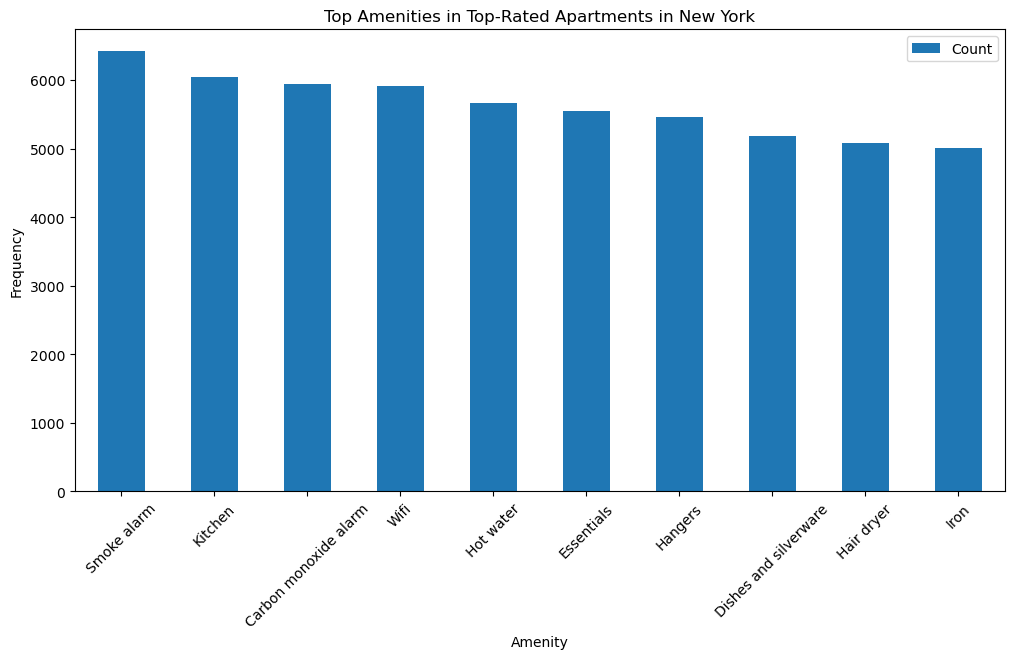

In [321]:
# Filter top-rated apartments based on a threshold for `review_scores_rating`
top_rated_threshold = 4.9  # Adjust this threshold as needed
top_rated = ny_listings[ny_listings['review_scores_rating'] >= top_rated_threshold]

# Drop rows with missing amenities
top_rated = top_rated.dropna(subset=['amenities'])

# Parse the 'amenities' column
top_rated['amenities'] = top_rated['amenities'].apply(lambda x: ast.literal_eval(x))

# Flatten the list of amenities for all top-rated apartments
top_amenities = [amenity for amenities_list in top_rated['amenities'] for amenity in amenities_list]

# Count the frequency of each amenity
amenity_counts = Counter(top_amenities)

# Convert to a DataFrame
top_amenities_df = pd.DataFrame.from_dict(amenity_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Display the top 10 most common amenities
print(top_amenities_df.head(10))

# Plot the top 10 most common amenities
top_amenities_df.head(10).plot(kind='bar', figsize=(12, 6), title="Top Amenities in Top-Rated Apartments in New York")
plt.ylabel('Frequency')
plt.xlabel('Amenity')
plt.xticks(rotation=45)
plt.show()

                       Count
Smoke alarm            13996
Carbon monoxide alarm  13105
Kitchen                13005
Wifi                   12687
Hot water              12651
Essentials             12336
Hangers                12259
Dishes and silverware  12085
Hair dryer             11955
Cooking basics         11460


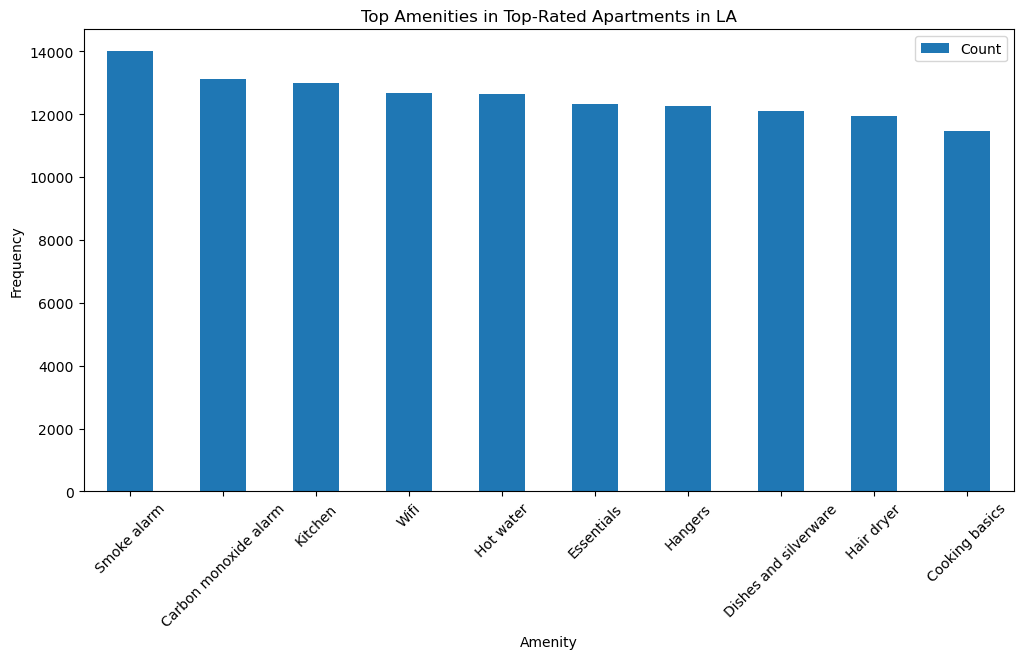

In [322]:
# Filter top-rated apartments based on a threshold for `review_scores_rating`
top_rated_threshold = 4.9  # Adjust this threshold as needed
top_rated = la_listings[la_listings['review_scores_rating'] >= top_rated_threshold]

# Drop rows with missing amenities
top_rated = top_rated.dropna(subset=['amenities'])

# Parse the 'amenities' column
top_rated['amenities'] = top_rated['amenities'].apply(lambda x: ast.literal_eval(x))

# Flatten the list of amenities for all top-rated apartments
top_amenities = [amenity for amenities_list in top_rated['amenities'] for amenity in amenities_list]

# Count the frequency of each amenity
amenity_counts = Counter(top_amenities)

# Convert to a DataFrame
top_amenities_df = pd.DataFrame.from_dict(amenity_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Display the top 10 most common amenities
print(top_amenities_df.head(10))

# Plot the top 10 most common amenities
top_amenities_df.head(10).plot(kind='bar', figsize=(12, 6), title="Top Amenities in Top-Rated Apartments in LA")
plt.ylabel('Frequency')
plt.xlabel('Amenity')
plt.xticks(rotation=45)
plt.show()

Top 10 Neighborhoods with Highest Ratings in Chicago:
neighbourhood_cleansed
Hegewisch         4.940
Ashburn           4.930
Mount Greenwood   4.910
South Deering     4.900
Pullman           4.900
Burnside          4.880
North Park        4.870
Oakland           4.870
Albany Park       4.870
North Center      4.860
Name: review_scores_rating, dtype: float64


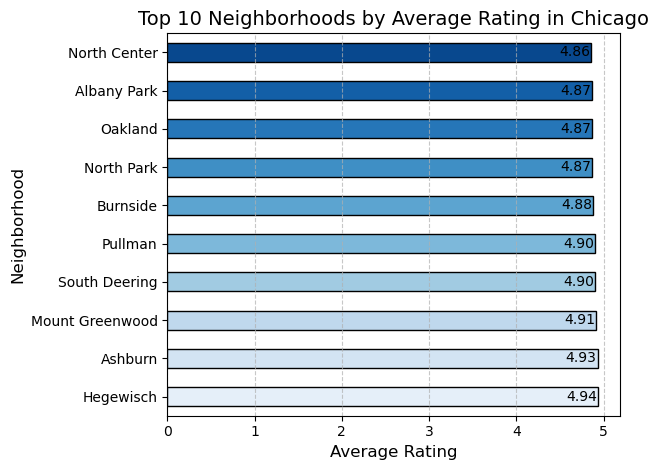

In [323]:
# Filter rows with valid ratings and neighborhoods
valid_ratings = chicago_listings.dropna(subset=['review_scores_rating', 'neighbourhood_cleansed'])

# Group by neighborhoods and calculate the average rating
neighborhood_ratings = valid_ratings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().round(2).sort_values(ascending=False)

# Display the top 10 neighborhoods with the highest average ratings
top_neighborhoods = neighborhood_ratings.head(10)
print("Top 10 Neighborhoods with Highest Ratings in Chicago:")
print(top_neighborhoods)

# Use a horizontal bar plot with a color gradient
colors = sns.color_palette("Blues", len(top_neighborhoods))
top_neighborhoods.plot(kind='barh', color=colors, edgecolor='black')

# Add data labels for each bar
for index, value in enumerate(top_neighborhoods):
    plt.text(value - 0.01, index, f'{value:.2f}', va='center', ha='right', color='black', fontsize=10)

# Add gridlines for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Titles and labels
plt.title("Top 10 Neighborhoods by Average Rating in Chicago", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

To rank neighborhoods and know which are then ones that usually achieve higher reviews, we group the listings on each neighborhood and obtain the average rating. Then, we rank them and visualize the ones with the highest rating. We repeat the analysis with New York and LA.

Top 10 Neighborhoods with Highest Ratings in New York:
neighbourhood_cleansed
Navy Yard                    5.000
Country Club                 5.000
Dongan Hills                 5.000
Chelsea, Staten Island       5.000
Todt Hill                    5.000
West Farms                   5.000
Bay Terrace, Staten Island   5.000
Woodrow                      5.000
Neponsit                     5.000
Douglaston                   4.970
Name: review_scores_rating, dtype: float64


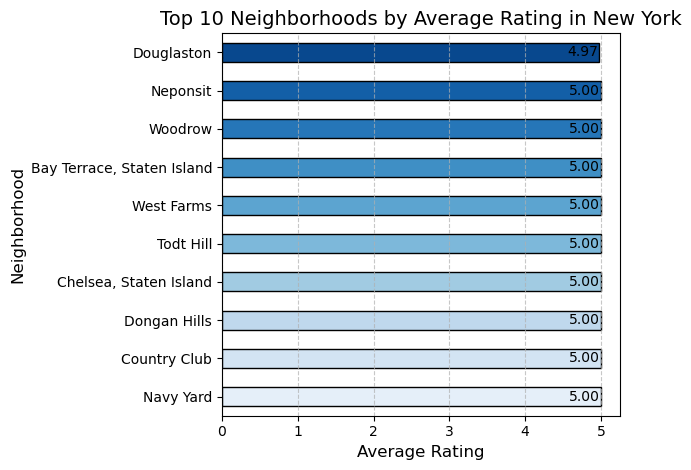

In [324]:
# Filter rows with valid ratings and neighborhoods
valid_ratings = ny_listings.dropna(subset=['review_scores_rating', 'neighbourhood_cleansed'])

# Group by neighborhoods and calculate the average rating
neighborhood_ratings = valid_ratings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().round(2).sort_values(ascending=False)

# Display the top 10 neighborhoods with the highest average ratings
top_neighborhoods = neighborhood_ratings.head(10)
print("Top 10 Neighborhoods with Highest Ratings in New York:")
print(top_neighborhoods)

# Use a horizontal bar plot with a color gradient
colors = sns.color_palette("Blues", len(top_neighborhoods))
top_neighborhoods.plot(kind='barh', color=colors, edgecolor='black')

# Add data labels for each bar
for index, value in enumerate(top_neighborhoods):
    plt.text(value - 0.01, index, f'{value:.2f}', va='center', ha='right', color='black', fontsize=10)

# Add gridlines for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Titles and labels
plt.title("Top 10 Neighborhoods by Average Rating in New York", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Top 10 Neighborhoods with Highest Ratings in LA:
neighbourhood_cleansed
Rancho Dominguez       5.000
Sun Village            4.960
Ridge Route            4.960
Westlake Village       4.960
Sepulveda Basin        4.960
Shadow Hills           4.960
La Canada Flintridge   4.940
Sierra Madre           4.940
Sunland                4.930
Century City           4.930
Name: review_scores_rating, dtype: float64


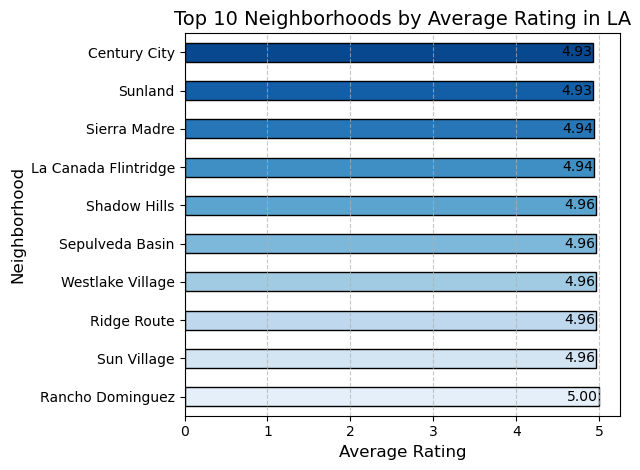

In [325]:
# Filter rows with valid ratings and neighborhoods
valid_ratings = la_listings.dropna(subset=['review_scores_rating', 'neighbourhood_cleansed'])

# Group by neighborhoods and calculate the average rating
neighborhood_ratings = valid_ratings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().round(2).sort_values(ascending=False)

# Display the top 10 neighborhoods with the highest average ratings
top_neighborhoods = neighborhood_ratings.head(10)
print("Top 10 Neighborhoods with Highest Ratings in LA:")
print(top_neighborhoods)

# Use a horizontal bar plot with a color gradient
colors = sns.color_palette("Blues", len(top_neighborhoods))
top_neighborhoods.plot(kind='barh', color=colors, edgecolor='black')

# Add data labels for each bar
for index, value in enumerate(top_neighborhoods):
    plt.text(value - 0.01, index, f'{value:.2f}', va='center', ha='right', color='black', fontsize=10)

# Add gridlines for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Titles and labels
plt.title("Top 10 Neighborhoods by Average Rating in LA", fontsize=14)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Neighborhood", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

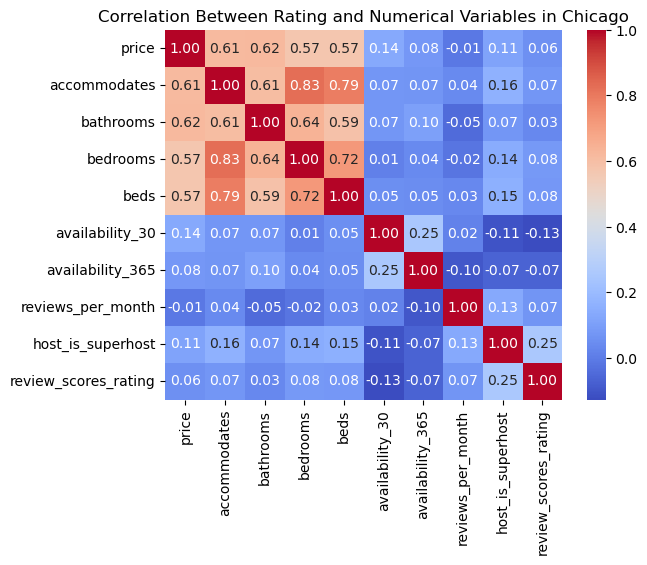

In [326]:
# Select numerical columns
numerical_vars = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30', 'availability_365', 'reviews_per_month','host_is_superhost']

# Filter dataset for valid ratings
valid_data = chicago_listings.dropna(subset=['review_scores_rating'])

# Correlation heatmap
correlations = valid_data[numerical_vars + ['review_scores_rating']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Rating and Numerical Variables in Chicago")
plt.show()


We proceed to discover the relationship between our variables of interest, price and rating, and the rest of the numeric variables present in the dataset. We create a correlation table that presents a matrix with the correlations between these variables. We observe that rating is associated with variables related to the size of the apartment. Meanwhile, ratings do not present a significant correlation with any variable other than superhost status, which is still a small correlation. We repeat the analysis with New York and LA.

C:\Users\benja\AppData\Local\Temp\ipykernel_35140\4262533884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['host_is_superhost'] = ny_listings['host_is_superhost'].map({'f': False, 't': True})


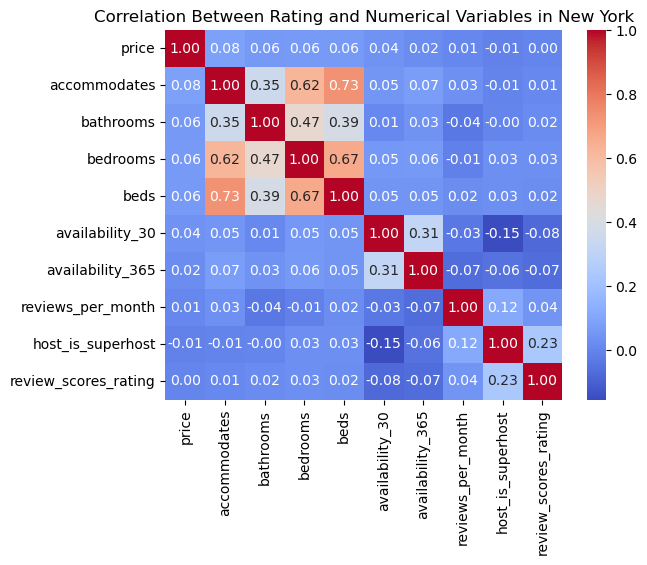

In [327]:
# Select numerical columns
numerical_vars = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30', 'availability_365', 'reviews_per_month','host_is_superhost']

# Filter dataset for valid ratings
valid_data = ny_listings.dropna(subset=['review_scores_rating'])

# Correlation heatmap
valid_data['host_is_superhost'] = ny_listings['host_is_superhost'].map({'f': False, 't': True})
correlations = valid_data[numerical_vars + ['review_scores_rating']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Rating and Numerical Variables in New York")
plt.show()

Nonetheless, price is not correlated with variables related to size for NYC, presumably because small apartments within the city are costly, and houses with more bedroom are further away from the city.

C:\Users\benja\AppData\Local\Temp\ipykernel_35140\1756499144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['host_is_superhost'] = la_listings['host_is_superhost'].map({'f': False, 't': True})


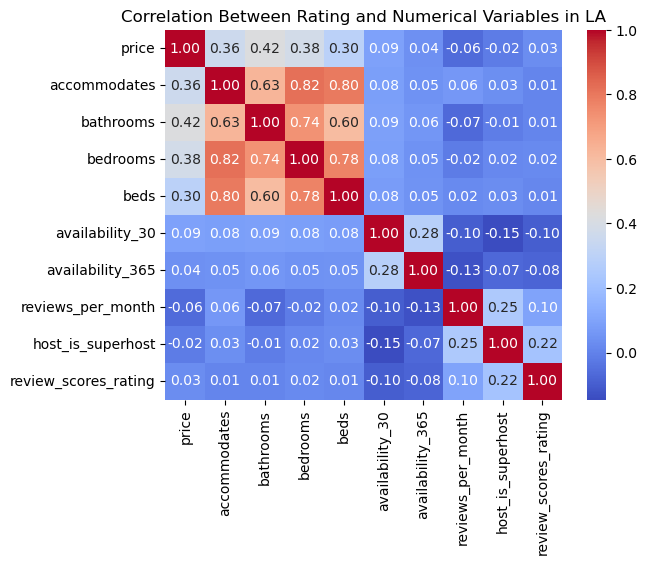

In [328]:
# Select numerical columns
numerical_vars = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30', 'availability_365', 'reviews_per_month','host_is_superhost']

# Filter dataset for valid ratings
valid_data = la_listings.dropna(subset=['review_scores_rating'])

# Correlation heatmap
valid_data['host_is_superhost'] = la_listings['host_is_superhost'].map({'f': False, 't': True})
correlations = valid_data[numerical_vars + ['review_scores_rating']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Rating and Numerical Variables in LA")
plt.show()

However, this correlation trend between price and size factors returns to LA but with a milder degree.

In [329]:
# Define numerical variables
numerical_vars = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30', 'availability_365', 'reviews_per_month', 'host_is_superhost']

# Convert numerical columns to numeric and coerce invalid values to NaN
for col in numerical_vars:
    if col != 'host_is_superhost':  # Skip the boolean column
        chicago_listings[col] = pd.to_numeric(chicago_listings[col], errors='coerce')

# Handle missing values
chicago_listings['review_scores_rating'] = pd.to_numeric(chicago_listings['review_scores_rating'], errors='coerce')
chicago_listings['reviews_per_month'] = chicago_listings['reviews_per_month'].fillna(0)
chicago_listings['host_is_superhost'] = chicago_listings['host_is_superhost'].map({True: 1, False: 0}).fillna(0)
chicago_listings['bathrooms'] = chicago_listings['bathrooms'].fillna(chicago_listings['bathrooms'].median())
chicago_listings['bedrooms'] = chicago_listings['bedrooms'].fillna(chicago_listings['bedrooms'].median())
chicago_listings['beds'] = chicago_listings['beds'].fillna(chicago_listings['beds'].median())

# Drop rows with missing target variable
regression_data = chicago_listings[['review_scores_rating'] + numerical_vars].dropna()

# Prepare data for regression
X = sm.add_constant(regression_data[numerical_vars])  # Add intercept
Y = regression_data['review_scores_rating']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.078
Model:                              OLS   Adj. R-squared:                  0.077
Method:                   Least Squares   F-statistic:                     58.98
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):          4.88e-104
Time:                          13:22:48   Log-Likelihood:                -2916.1
No. Observations:                  6241   AIC:                             5852.
Df Residuals:                      6231   BIC:                             5920.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

We then perform regression analysis to understand what amenities hold a statisctically significant relationship with ratings. We observe that 5 variables are statistically significant with alpha set at 5%. We repeat the analysis with NY and LA.

In [330]:
# Define numerical variables
numerical_vars = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30', 'availability_365', 'reviews_per_month', 'host_is_superhost']

# Convert numerical columns to numeric and coerce invalid values to NaN
for col in numerical_vars:
    if col != 'host_is_superhost':  # Skip the boolean column
        ny_listings[col] = pd.to_numeric(ny_listings[col], errors='coerce')

# Handle missing values
ny_listings['review_scores_rating'] = pd.to_numeric(ny_listings['review_scores_rating'], errors='coerce')
ny_listings['reviews_per_month'] = ny_listings['reviews_per_month'].fillna(0)
ny_listings['host_is_superhost'] = ny_listings['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0)
ny_listings['bathrooms'] = ny_listings['bathrooms'].fillna(ny_listings['bathrooms'].median())
ny_listings['bedrooms'] = ny_listings['bedrooms'].fillna(ny_listings['bedrooms'].median())
ny_listings['beds'] = ny_listings['beds'].fillna(ny_listings['beds'].median())

# Drop rows with missing target variable
regression_data = ny_listings[['review_scores_rating'] + numerical_vars].dropna()

# Prepare data for regression
X = sm.add_constant(regression_data[numerical_vars])  # Add intercept
Y = regression_data['review_scores_rating']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.059
Model:                              OLS   Adj. R-squared:                  0.058
Method:                   Least Squares   F-statistic:                     111.9
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):          1.86e-204
Time:                          13:22:48   Log-Likelihood:                -10154.
No. Observations:                 16102   AIC:                         2.033e+04
Df Residuals:                     16092   BIC:                         2.040e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In the New York regression, the number of beds is not a good predictor of rating.

In [331]:
# Define numerical variables
numerical_vars = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'availability_30', 'availability_365', 'reviews_per_month', 'host_is_superhost']

# Convert numerical columns to numeric and coerce invalid values to NaN
for col in numerical_vars:
    if col != 'host_is_superhost':  # Skip the boolean column
        la_listings[col] = pd.to_numeric(la_listings[col], errors='coerce')

# Handle missing values
la_listings['review_scores_rating'] = pd.to_numeric(la_listings['review_scores_rating'], errors='coerce')
la_listings['reviews_per_month'] = la_listings['reviews_per_month'].fillna(0)
la_listings['host_is_superhost'] = la_listings['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0)
la_listings['bathrooms'] = la_listings['bathrooms'].fillna(la_listings['bathrooms'].median())
la_listings['bedrooms'] = la_listings['bedrooms'].fillna(la_listings['bedrooms'].median())
la_listings['beds'] = la_listings['beds'].fillna(la_listings['beds'].median())

# Drop rows with missing target variable
regression_data = la_listings[['review_scores_rating'] + numerical_vars].dropna()


# Prepare data for regression
X = sm.add_constant(regression_data[numerical_vars])  # Add intercept
Y = regression_data['review_scores_rating']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.059
Model:                              OLS   Adj. R-squared:                  0.059
Method:                   Least Squares   F-statistic:                     195.8
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                          13:22:48   Log-Likelihood:                -13920.
No. Observations:                 28132   AIC:                         2.786e+04
Df Residuals:                     28122   BIC:                         2.794e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

However, we observe that in LA, price, number of bedrooms, and number of people the place can accommodate is meaningul for explaining ratings, suggesting that these Airbnb customers expect different experiences in these three cities.

## **Part 02: Exploratory Analysis for Washington DC Airbnb Listings**

1. Cleaning dataset and keeping relevant attributes
2. Organizing dataset - addressing nulls, duplicates and extreme values


Questions we found answers to:
How does a host living in DC fare against one who doesn’t live on site?
Why is one neighborhood particularly expensive?
Factors that affect Airbnb Ratings
Factors that affect Airbnb Prices
Optimizations - What words resonate better with customers
Process:
Cleaned Data | Found Summary statistics for Nominal and Categorical
Data Analysis for Q1-5


In [332]:
import pandas as pd
listings_wdc_data = pd.read_csv("dc_listings full file.csv") #upload listings for Washington DC from insideairbnb.com after downloading locally.

In [333]:
print(listings_wdc_data) #check if correct file uploaded as dataframe
columns_to_keep = ['id', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_location', 'host_about', 'host_response_time',
                   'host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
                   'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'beds', 'amenities', 'price', 'number_of_reviews',
                   'review_scores_rating',	'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location', 'review_scores_value']
listings_wdc_data = listings_wdc_data[columns_to_keep] #The aim is to analyse this data in two directions - understand the relationship between host traits and revies and ratings for their properties. Another direction is to understand which locations have higher average prices and other similarly assosciated comparisons (etting rid of irrelvant columns like picture urls, airbnb websites etc. and identifying information like host name.
print(listings_wdc_data.head(10))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [334]:
null_counts = listings_wdc_data.isnull().sum()
print(null_counts[null_counts > 0]) #checking the number of nulls per column to identify patterns to clean data and organize it.
duplicates = listings_wdc_data[listings_wdc_data.duplicated(keep = False)]
print(duplicates) #There is one duplicate - index number 2979 = index number 2890. We will keep the first one.
listings_wdc_data.drop_duplicates(keep = 'first', inplace = True)
duplicatesfinal = listings_wdc_data[listings_wdc_data.duplicated(keep = False)]
print(duplicatesfinal)

description                      96
neighborhood_overview          1431
host_location                   910
host_about                     1683
host_response_time              228
host_is_superhost               149
host_neighbourhood              163
neighbourhood                  1431
beds                            758
price                           744
review_scores_rating            745
review_scores_accuracy          750
review_scores_cleanliness       750
review_scores_checkin           750
review_scores_communication     750
review_scores_location          750
review_scores_value             750
dtype: int64
                         id                                name  \
2979 719679000000000000.000  Marriott At The Mayflower - Studio   
2980 719679000000000000.000  Marriott At The Mayflower - Studio   

                                            description  \
2979  Approximately 350 square feet, this extravagan...   
2980  Approximately 350 square feet, this extravagan...

In [335]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.reset_option('all') #The dataset is too big - Jupyter notebook refuses to process the display entirely, so we go back to default displays.
print(listings_wdc_data)

                id                                              name  \
0     3.686000e+03                                   Vita's Hideaway   
1     3.943000e+03                  Historic Rowhouse Near Monuments   
2     4.197000e+03                Capitol Hill Bedroom walk to Metro   
3     4.529000e+03                         Bertina's  House Part One   
4     5.589000e+03                          Cozy apt in Adams Morgan   
...            ...                                               ...   
4923  1.180030e+18                     New Petworth Apt with Parking   
4924  1.180070e+18                           Charming private studio   
4925  1.180460e+18  Cozy Transportation-Friendly Home in Fort Totten   
4926  1.180740e+18                     Spacious 3BR Home, Near Metro   
4927  1.181140e+18   Cozy Apartment at DC! Sun Filled & Comfortable!   

                                            description  \
0     IMPORTANT NOTES<br />* Carefully read and be s...   
1     You will be

In [336]:
listings_wdc_dataedits = listings_wdc_data.copy()
listings_wdc_dataedits.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
                                 'review_scores_cleanliness','review_scores_checkin',
                                 'review_scores_communication','review_scores_location',
                                 'review_scores_value'], inplace = True, how = 'all')
print(listings_wdc_dataedits)
null_counts2 = listings_wdc_dataedits.isnull().sum()
print(null_counts2[null_counts2 > 0]) #checking the number of nulls per column again to identify patterns to clean data and organize it.

                id                                             name  \
0     3.686000e+03                                  Vita's Hideaway   
1     3.943000e+03                 Historic Rowhouse Near Monuments   
2     4.197000e+03               Capitol Hill Bedroom walk to Metro   
3     4.529000e+03                        Bertina's  House Part One   
4     5.589000e+03                         Cozy apt in Adams Morgan   
...            ...                                              ...   
4907  1.174780e+18    Apartment - Just 2 blocks from Supreme Court!   
4909  1.174850e+18                            City Escape - DC Home   
4911  1.176090e+18                                  Sapphire Sarouk   
4912  1.176910e+18                   Georgetown Stay: Private entry   
4927  1.181140e+18  Cozy Apartment at DC! Sun Filled & Comfortable!   

                                            description  \
0     IMPORTANT NOTES<br />* Carefully read and be s...   
1     You will be staying in 

In [337]:
listings_wdc_dataedits.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
                                        'review_scores_cleanliness','review_scores_checkin',
                                        'review_scores_communication','review_scores_location',
                                        'review_scores_value',
                                        'price', 'host_neighbourhood',
                                        'host_response_time', 'host_location', 'host_is_superhost', 'beds'], inplace = True, how = 'any')
print(listings_wdc_dataedits)
null_counts2 = listings_wdc_dataedits.isnull().sum()
print(null_counts2[null_counts2 > 0]) #checking the number of nulls per column again to identify patterns to clean data and organize it.
#Removing all rows with 'any' nulls in sections related to ratings and reviews - as no random fill in will justify the real data - which just seems to be missing from some records.
#Removing all rows with nulls in the price sections as such data is almost unusuable in analysis related to price. Any listing with no details related to price is probably bogus or has errors - so it is better to remove the record in entirety
#Removing all rows with nulls in the host specifics like response times as no analysis can be conducted keeping in mind that empty records may unfairly deviate any rate average summarizations and result in inaccurate analysis.
#Retaining empty descriptions, and host descriptions as they are optional and not nominal - they are qualitative datapoints - which may turn out to be important as we explore this dataset further.

                id                                               name  \
0     3.686000e+03                                    Vita's Hideaway   
1     3.943000e+03                   Historic Rowhouse Near Monuments   
2     4.197000e+03                 Capitol Hill Bedroom walk to Metro   
5     6.165000e+03   Private Bath & Laundry  + Huge Lower Level Suite   
6     7.103000e+03  Lovely guest suite in a quiet but close-in nei...   
...            ...                                                ...   
4903  1.174010e+18  Sunny, Chic, Centrally Located, w/ Parking & A...   
4907  1.174780e+18      Apartment - Just 2 blocks from Supreme Court!   
4909  1.174850e+18                              City Escape - DC Home   
4911  1.176090e+18                                    Sapphire Sarouk   
4912  1.176910e+18                     Georgetown Stay: Private entry   

                                            description  \
0     IMPORTANT NOTES<br />* Carefully read and be s...   
1    

In [338]:
listings_wdc_dataedits = listings_wdc_dataedits[~listings_wdc_dataedits['property_type'].str.contains('private|shared|room in', case = False, na=False)]
null_counts3 = listings_wdc_dataedits.isnull().sum()
print(null_counts3[null_counts3 > 0]) #Removing all 'private' properties from the data. For example, 5 rooms in an apartment held by the same host were listed as 5 different records - with 4 of those empty of most other details like reviews and descriptions.
#While there is significant data loss, it wasn't possible to filter out 1 of the 5 entries since they randomly had descriptions attached to any single entry of the five. This was random across the similarly listed records.
#Likewise, keeping one out of duplicated records based on location would have affected legitimate and different listings with entire apartments in the same building.
#It was also important to remove the records - as a host with 5 rooms in 1 townhouse was represented 5 times - which is problematic for locational analysis of the listing, as well as host specifications like response, location and verification stats. It skews them towards hosts who are listed multiple times due to having different rooms online instead of single records listed for all of those.
#It was also possible to conduct specifically listed records that were 'Entire' in their offering. Shared rooms, Private rooms within larger homes and rooms in hostels have thus not been considered in this analysis.

description               31
neighborhood_overview    502
host_about               628
neighbourhood            502
dtype: int64


In [339]:
listings_dcfinal = listings_wdc_dataedits.copy()
print(listings_dcfinal)
print(listings_dcfinal.info())
summary_statistics = listings_dcfinal.describe() #summary statistics for numerical data to understand the scope of attributes
pd.options.display.float_format = '{:.3f}'.format
print(listings_dcfinal.describe()) #understanding the format of relevant attributes to thereafter make changes in data types when needed (for example, converting object response time to categorical data)

                id                                               name  \
6     7.103000e+03  Lovely guest suite in a quiet but close-in nei...   
7     1.178500e+04                           Sanctuary near Cathedral   
11    2.768200e+04                Private 1-bed apartment-Walk to MET   
24    2.011160e+05                Victorian Haven - Private Basement!   
26    2.239220e+05  Private Retreat Apt. in DC. Pets are Welcome F...   
...            ...                                                ...   
4901  1.173420e+18  CAP Hill EngBsmt 2 blks EastMkt|MTRO FREE Parking   
4903  1.174010e+18  Sunny, Chic, Centrally Located, w/ Parking & A...   
4907  1.174780e+18      Apartment - Just 2 blocks from Supreme Court!   
4909  1.174850e+18                              City Escape - DC Home   
4911  1.176090e+18                                    Sapphire Sarouk   

                                            description  \
6     Private guest suite with cathedral ceiling, su...   
7    

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns
#importing plotting libraries, in case not already imported

This compares neighbourhoods by average prices. Most neighbourhoods have an average price of 200-300 USD. One neighbourhood, "Colonial Village" has double that as its average price.
Upon exploring why that may be, we find that it is at an absolute corner of DC. The price difference is due to a very limited inventory of homes, accompanied by geographical strengths like, metro conectivoty, quietness and greenery. People prefer calm and relaxtion as ideal activities making this an ideal location for weekending and longer "retreats".

                               neighbourhood_cleansed    mean  median     min  \
0                Brightwood Park, Crestwood, Petworth 146.352 120.000  51.000   
1                       Brookland, Brentwood, Langdon 148.062 121.000  59.000   
2                          Capitol Hill, Lincoln Park 194.490 166.000  72.000   
3     Capitol View, Marshall Heights, Benning Heights 160.444 125.000  64.000   
4      Cathedral Heights, McLean Gardens, Glover Park 271.440 188.000  80.000   
5   Cleveland Park, Woodley Park, Massachusetts Av... 190.893 134.000  70.000   
6   Colonial Village, Shepherd Park, North Portal ... 549.500 104.000  95.000   
7   Columbia Heights, Mt. Pleasant, Pleasant Plain... 155.480 133.000  65.000   
8    Congress Heights, Bellevue, Washington Highlands 104.727 106.000  50.000   
9   Deanwood, Burrville, Grant Park, Lincoln Heigh... 147.348 121.000  60.000   
10                           Douglas, Shipley Terrace 238.222 160.000  60.000   
11  Downtown, Chinatown, Pen

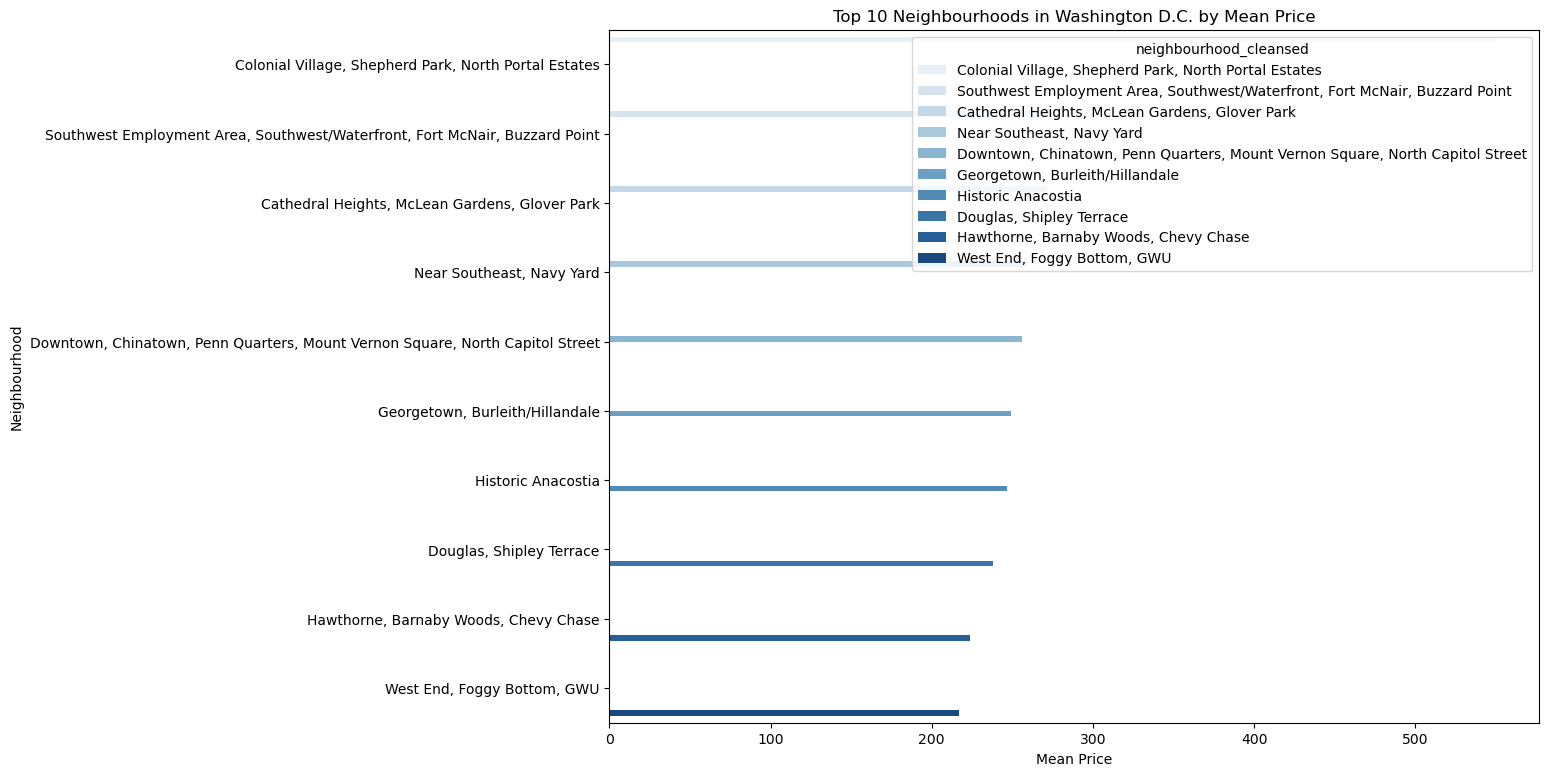

In [341]:
listings_dcfinal['price'] = listings_dcfinal['price'].astype(str)
listings_dcfinal['price'] = listings_dcfinal['price'].str.replace('$', '', regex = False).str.replace(',', '', regex = False)
listings_dcfinal['price'] = pd.to_numeric(listings_dcfinal['price'], errors = 'coerce')
price_summary = listings_dcfinal.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
print(price_summary)

#figure
plt.figure(figsize = (12, 9))
sns.barplot(data=price_summary.sort_values(by = 'mean', ascending = False).head(10),
           x = 'mean', y = 'neighbourhood_cleansed', hue = 'neighbourhood_cleansed', palette = 'Blues')
plt.title('Top 10 Neighbourhoods in Washington D.C. by Mean Price')
plt.xlabel('Mean Price')
plt.ylabel('Neighbourhood')
plt.show()

We found in our general exploration that hosts don't necessairly live in the same city. Curious to know if it affected their 'performance' as a host, we compared on-site hosts to hosts not living in DC. While it doesn't affect ratings too much, there is still a 0.1 unit drop in average ratings.

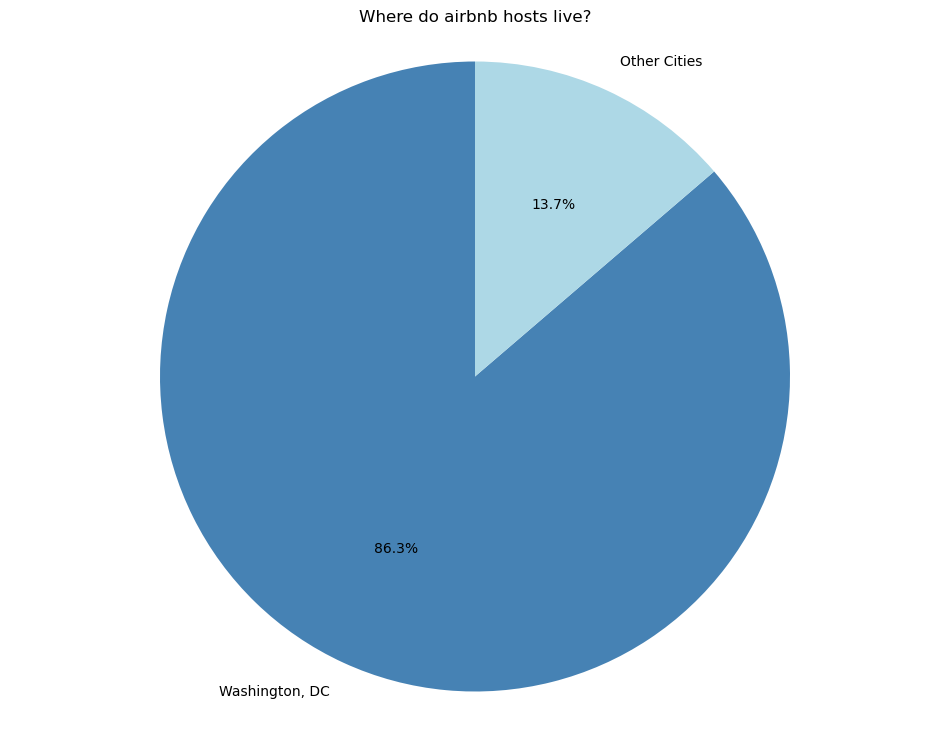

Correlation between Ratings and Price:                        review_scores_rating  price
review_scores_rating                 1.000  0.054
price                                0.054  1.000


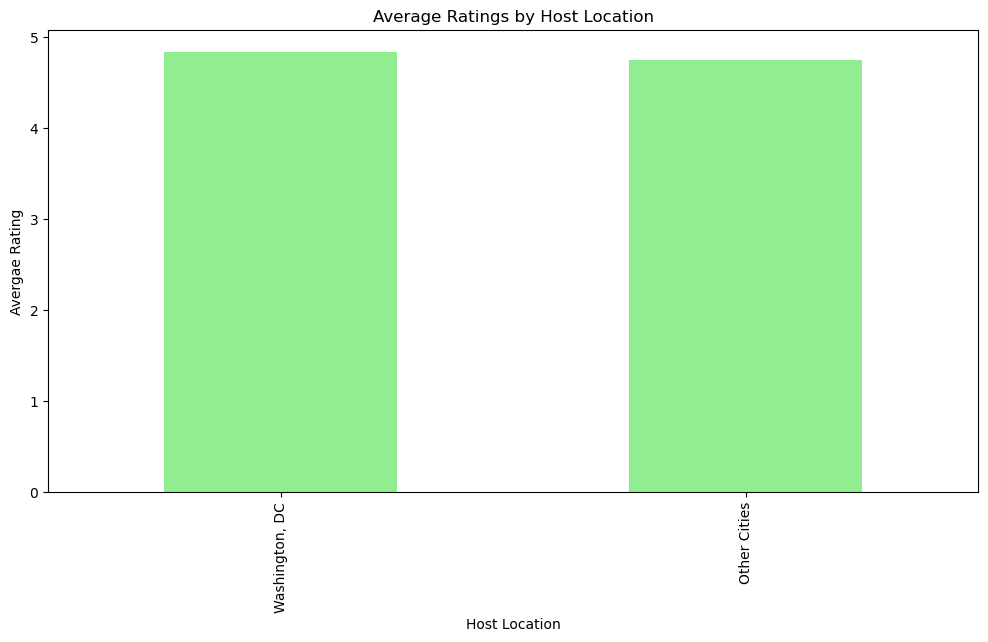

In [342]:
def hostindc (host_location): #function to identify if a host lives in DC or outside, sifting through all records
    if 'Washington, DC' in host_location:
        return 'Washington, DC'
    else:
        return 'Other Cities'

listings_dcfinal['host_location'] = listings_dcfinal['host_location'].apply(hostindc)
host_location_counts = listings_dcfinal['host_location'].value_counts()

#figure

plt.figure(figsize = (12, 9))
plt.pie(host_location_counts, labels = host_location_counts.index, autopct = '%1.1f%%', startangle = 90, colors = ['steelblue', 'lightblue'])
plt.title('Where do airbnb hosts live?')
plt.axis('equal')
plt.show()

avg_reviewscore_by_host_location = listings_dcfinal.groupby('host_location')['review_scores_rating'].mean().sort_values(ascending = False)

plt.figure(figsize = (12, 6))
avg_reviewscore_by_host_location.plot(kind = 'bar', color = 'lightgreen')
plt.title('Average Ratings by Host Location')
plt.xlabel('Host Location')
plt.ylabel('Avergae Rating')

correlation_price_hostlocation = listings_dcfinal[['review_scores_rating', 'price']].corr()
print("Correlation between Ratings and Price: ", correlation_price_hostlocation)

We ran an OLS regression to understand which review aspect (location, value, accuracy, cleanliness or checkin experience) affects the aggregate review rating most. We surprisingly found that location and communication have comparably lower effect. Checkin experience wasn't significant either.

                             review_scores_rating  review_scores_accuracy  \
review_scores_rating                        1.000                   0.763   
review_scores_accuracy                      0.763                   1.000   
review_scores_cleanliness                   0.713                   0.656   
review_scores_checkin                       0.484                   0.428   
review_scores_communication                 0.730                   0.587   
review_scores_location                      0.434                   0.445   
review_scores_value                         0.788                   0.716   

                             review_scores_cleanliness  review_scores_checkin  \
review_scores_rating                             0.713                  0.484   
review_scores_accuracy                           0.656                  0.428   
review_scores_cleanliness                        1.000                  0.422   
review_scores_checkin                            0.422     

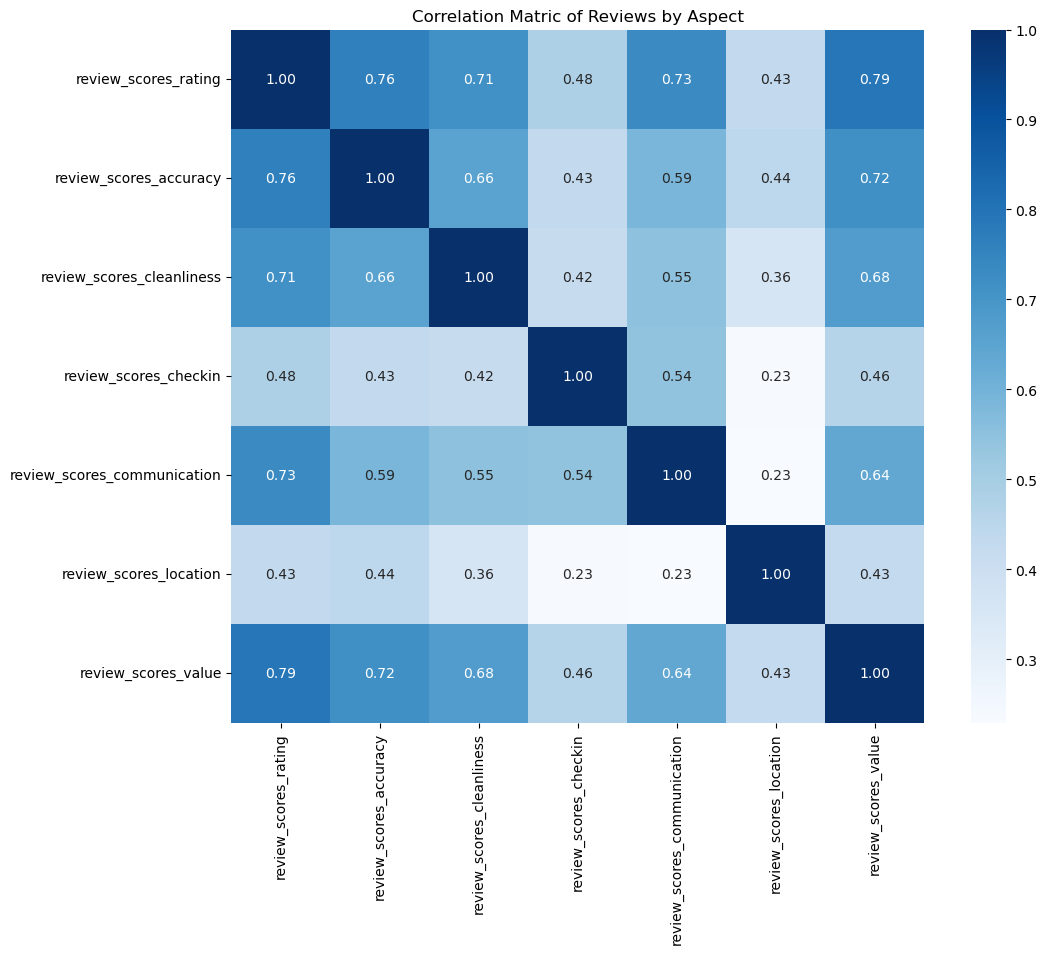

In [343]:
import statsmodels.api as sm #for regression analysis

correlation_matrix_reviews = listings_dcfinal[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr()
print(correlation_matrix_reviews)

plt.figure(figsize = (12, 9)) #figure
sns.heatmap(correlation_matrix_reviews, annot = True, cmap = 'Blues', fmt = '.2f', square = True)
plt.title("Correlation Matric of Reviews by Aspect")

x = listings_dcfinal[['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
y = listings_dcfinal['review_scores_rating']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary()) #regression analysis

In our exploration, we measured which neighbourhoods out of 38 fall in the 3-4.0 average rating. Turns out, none.

We then analysed the data in terms of ranking neighbourhoods by their average ratings - and found the tourist places are more popularly rated higher than regions further away.

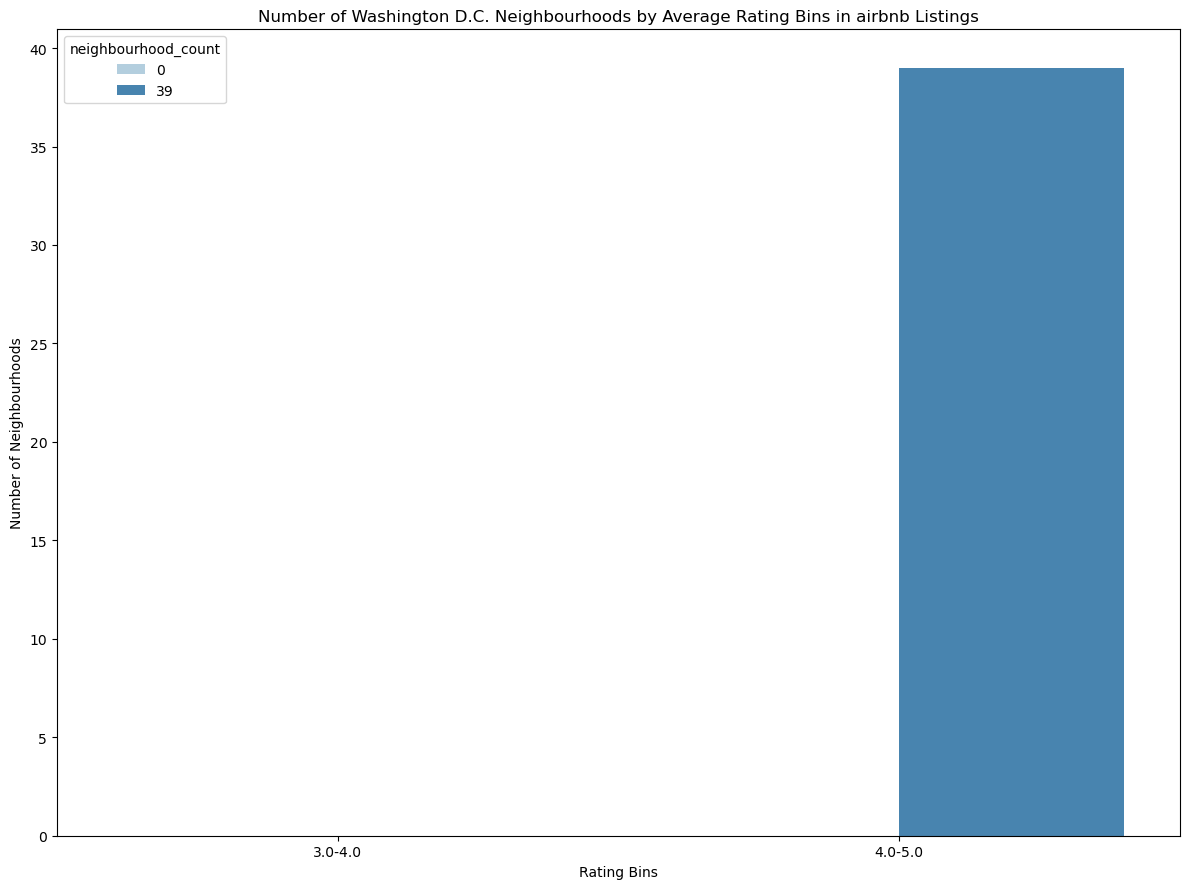

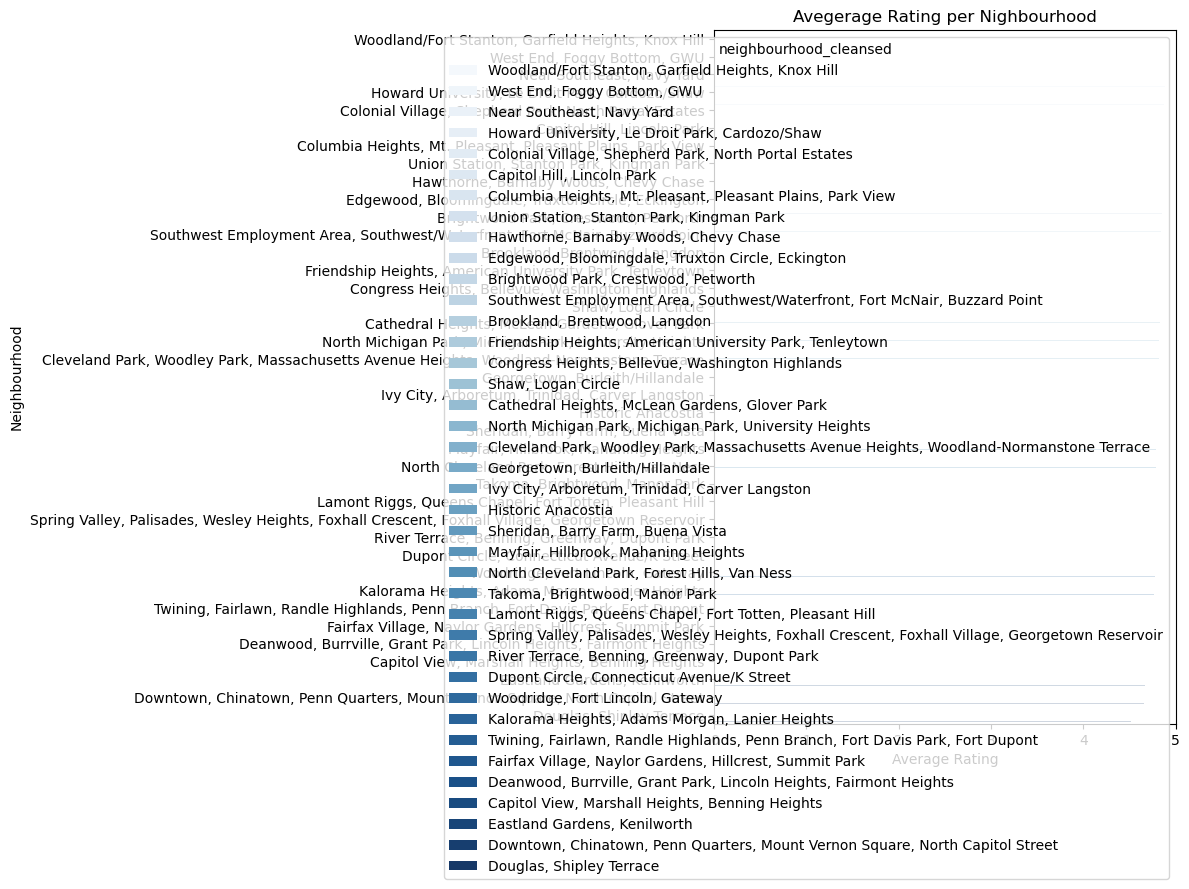

In [344]:
avg_rating_per_neighbourhood = listings_dcfinal.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()
avg_rating_per_neighbourhood.columns = ['neighbourhood_cleansed', 'average_rating']
avg_rating_per_neighbourhood = avg_rating_per_neighbourhood.sort_values(by='average_rating', ascending = False)

bins = [3.0, 4.0, 5.0]
labels = ['3.0-4.0', '4.0-5.0']
avg_rating_per_neighbourhood['rating_bins'] = pd.cut(avg_rating_per_neighbourhood['average_rating'], bins = bins, labels = labels, right = False)

neighbourhood_counts = avg_rating_per_neighbourhood['rating_bins']. value_counts().reset_index()
neighbourhood_counts.columns = ['rating bins', 'neighbourhood_count']

plt.figure(figsize = (12, 9))
sns.barplot(data = neighbourhood_counts, x = 'rating bins', y = 'neighbourhood_count', hue = 'neighbourhood_count', palette = 'Blues')
plt.title('Number of Washington D.C. Neighbourhoods by Average Rating Bins in airbnb Listings')
plt.xlabel('Rating Bins')
plt.ylabel('Number of Neighbourhoods')
plt.tight_layout()
plt.show()

#figure

plt.figure(figsize = (12, 9))
sns.barplot(data = avg_rating_per_neighbourhood, x = 'average_rating', y = 'neighbourhood_cleansed', hue = 'neighbourhood_cleansed', palette = 'Blues')
plt.title ('Avegerage Rating per Nighbourhood')
plt.xlabel('Average Rating')
plt.ylabel('Neighbourhood')
plt.xlim(0,5)
plt.tight_layout()
plt.show()

We conducted regression analysis for factors we thought would affect price. We found that neighbourhoods, host response time and superhost status insignificantly affect price.

We also found that beds highly affect pricing - which is obvious in some ways considering more people can be accommodated. This may mean some degree of multicollinearity - which the regression summary also pointed at.

C:\Users\benja\AppData\Local\Temp\ipykernel_35140\1468389999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_dcfinal_price_factors['host_is_superhost'] = listings_dcfinal_price_factors['host_is_superhost'].map({'t': 1, 'f': 0})
C:\Users\benja\AppData\Local\Temp\ipykernel_35140\1468389999.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_dcfinal_price_factors['host_identity_verified'] = listings_dcfinal_price_factors['host_identity_verified'].map({'t': 1, 'f': 0})


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          3.24e-132
Time:                        13:22:59   Log-Likelihood:                -13071.
No. Observations:                2121   AIC:                         2.616e+04
Df Residuals:                    2113   BIC:                         2.620e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     83

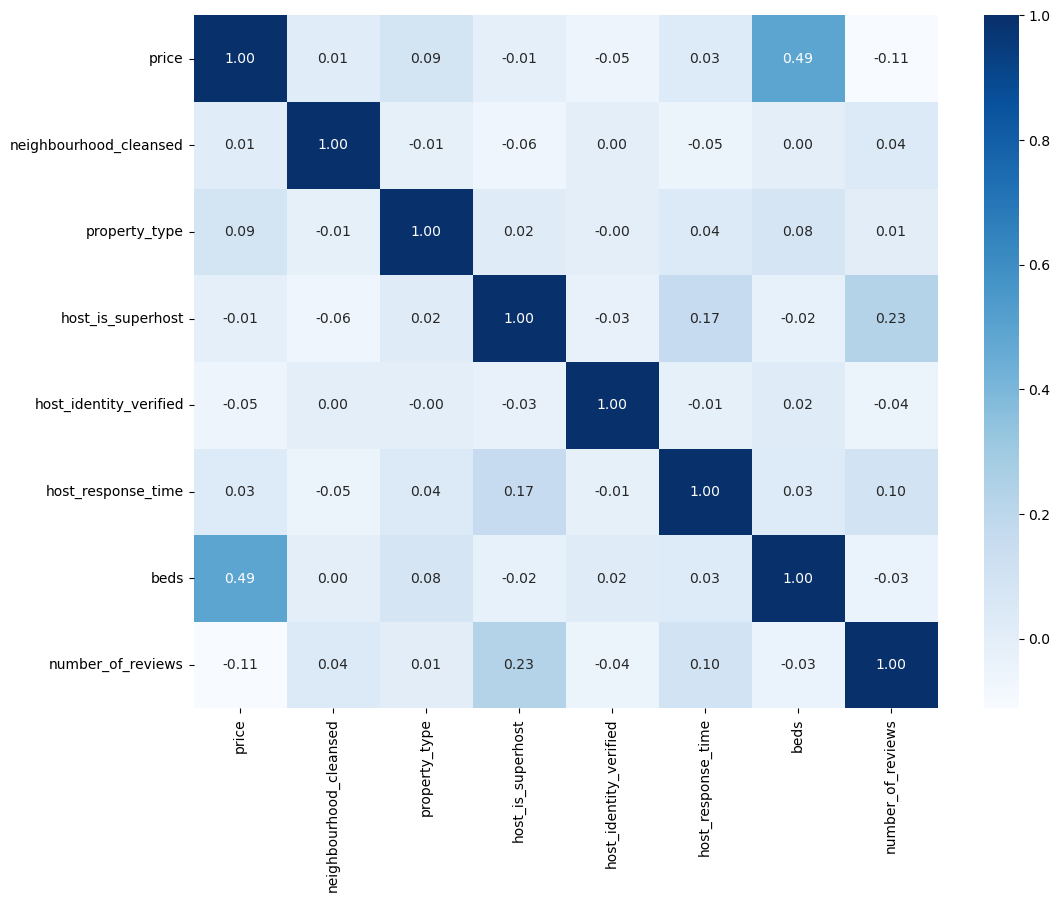

In [345]:
listings_dcfinal_price_factors = listings_dcfinal[['price', 'neighbourhood_cleansed', 'property_type', 'host_is_superhost',
'host_identity_verified', 'host_response_time', 'beds', 'number_of_reviews']]

listings_dcfinal_price_factors.loc[:, 'neighbourhood_cleansed'] = listings_dcfinal_price_factors['neighbourhood_cleansed'].astype('category').cat.codes
listings_dcfinal_price_factors.loc[:, 'property_type'] = listings_dcfinal_price_factors['property_type'].astype('category').cat.codes
listings_dcfinal_price_factors.loc[:, 'host_response_time'] = listings_dcfinal_price_factors['host_response_time'].astype('category').cat.codes

listings_dcfinal_price_factors['host_is_superhost'] = listings_dcfinal_price_factors['host_is_superhost'].map({'t': 1, 'f': 0})
listings_dcfinal_price_factors['host_identity_verified'] = listings_dcfinal_price_factors['host_identity_verified'].map({'t': 1, 'f': 0})

correlation_matrix_price_factors = listings_dcfinal_price_factors.corr()

plt.figure(figsize = (12,9)) #figure
sns.heatmap(correlation_matrix_price_factors, annot = True, fmt = ".2f", cmap = 'Blues', linewidth = 0, cbar = True)

y = listings_dcfinal_price_factors['price']
x = listings_dcfinal_price_factors.drop(columns = ['price'])
x = x.apply(pd.to_numeric, errors = 'coerce')
x = sm.add_constant(x)

model = sm.OLS(y, x).fit() #regression
print(model.summary())

Optimizations were conducted for understanding,

1. Which amenities are most mentioned in the top rated (rating >= 4.9) Airbnbs?

Here, we found that while safety amenities are largely mandated and thus show up as frequently mentioned, other optional amenities like kitchette items - essentials, microwaves and dishware are features that resonate better with customers. Likewise also for items that promote independence in sustenance like irons and the option to self-check-in.

C:\Users\benja\AppData\Local\Temp\ipykernel_35140\3571386767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_rated_listings_dc['amenities'] = highly_rated_listings_dc['amenities'].apply(ast.literal_eval) #to work on as a string.


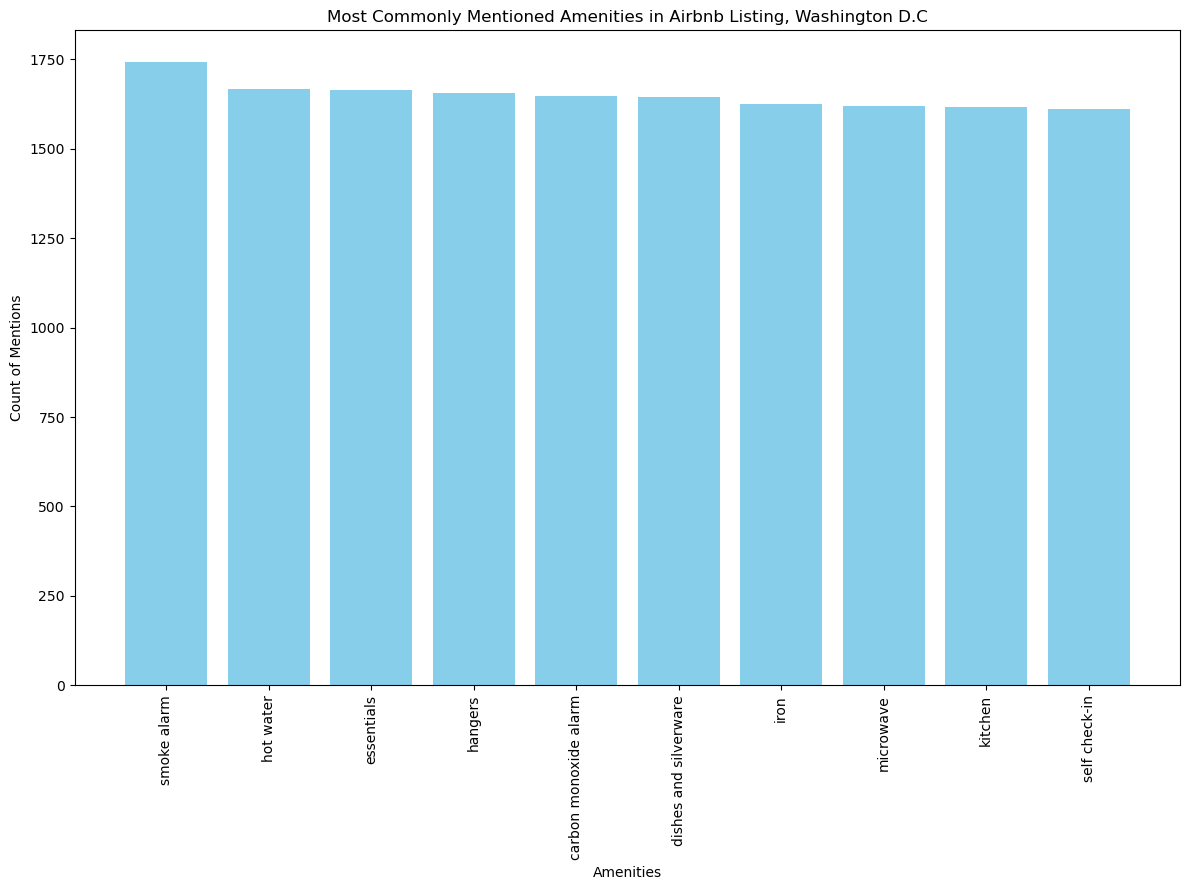

In [346]:
import ast
from collections import Counter
rating_threshold = 4.7
highly_rated_listings_dc = listings_dcfinal[listings_dcfinal['review_scores_rating'] >= rating_threshold]

highly_rated_listings_dc['amenities'] = highly_rated_listings_dc['amenities'].apply(ast.literal_eval) #to work on as a string.
all_amenities = [amenity.lower().strip() for sublist in highly_rated_listings_dc['amenities'] for amenity in sublist] #stripping amentities and making items as lowercase in list of 'amenities' attribute in dataframe.
amenity_counts = Counter(all_amenities) #counting each amenity

top10_amenities = amenity_counts.most_common(10) #limiting analysis to top10
top10_amenities_dc_df = pd.DataFrame(top10_amenities, columns = ['Amenity', 'Count'])

plt.figure(figsize = (12, 9)) #figure
plt.bar(top10_amenities_dc_df['Amenity'], top10_amenities_dc_df['Count'], color = 'skyblue')
plt.title("Most Commonly Mentioned Amenities in Airbnb Listing, Washington D.C")
plt.xlabel("Amenities")
plt.ylabel("Count of Mentions")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Optimizations were conducted for understanding

2. Which words are most mentioned in the descriptions of top rated (rating >= 4.9) Airbnbs?

Here, we found that while articles in speech obviously show up as frequently mentioned, other specific phrases like 'dc, 'br', 'capitol' resonate better with customers. We can infer then that customers like understanding the locational information (street connectivity and metro access, and tourist-y items) related information from descriptions. Likewise, apartment design informatin - number of bedrooms and if it is entire apartments or not might make understanding the listing better for a customer.

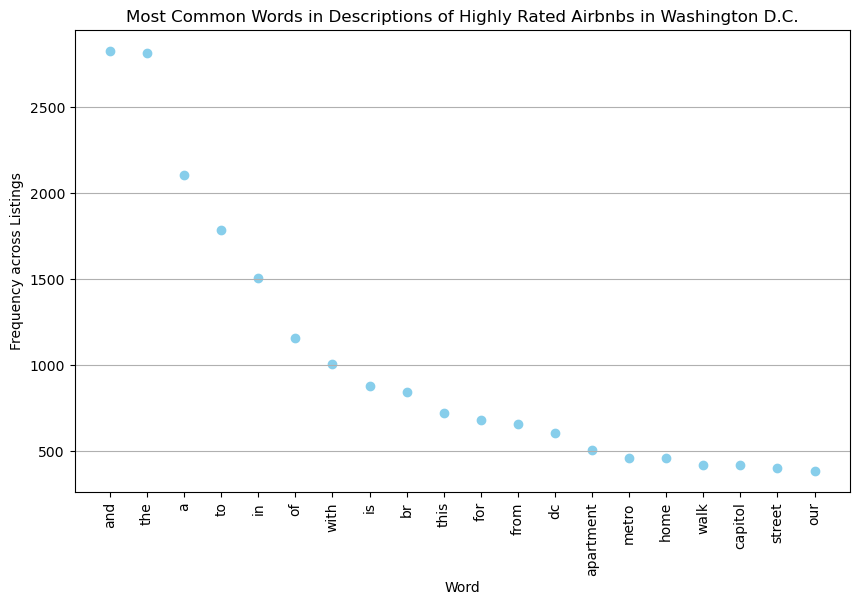

In [347]:
from collections import Counter
import re

rating_threshold = 4.9
highly_rated_listings_dc = listings_dcfinal[listings_dcfinal['review_scores_rating'] >= rating_threshold]
highly_rated_listings_dc.loc[:, 'description'] = highly_rated_listings_dc['description'].fillna('')
all_descriptions = ' '.join(highly_rated_listings_dc['description'].astype(str))
all_descriptions = all_descriptions.lower()
all_descriptions = re.sub(r'[^\w\s]', '', all_descriptions)
words = all_descriptions.split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words_df = pd.DataFrame(most_common_words, columns = ['word', 'count'])
words_df['word'] = words_df['word'].astype(str)

plt.figure(figsize = (10, 6))
plt.scatter(words_df['word'], words_df['count'], color = 'skyblue')
plt.title('Most Common Words in Descriptions of Highly Rated Airbnbs in Washington D.C.')
plt.xlabel("Word")
plt.ylabel("Frequency across Listings")
plt.xticks(rotation =90)
plt.grid(axis = 'y')

Optimizations were conducted for understanding

3. Which words are most mentioned in the titles of top rated (rating >= 4.9) Airbnbs?

We found that most titles included:

Locational information, Apartment Design information, Closeness to Capitol Area, suggesting that people like understanding within moments of reference about these details. Since these show up on search engines, and also on maps - it is important to have titles that carry maximum information. These optimizations in title can significantly improve visibility and thereby ratings for a listing.

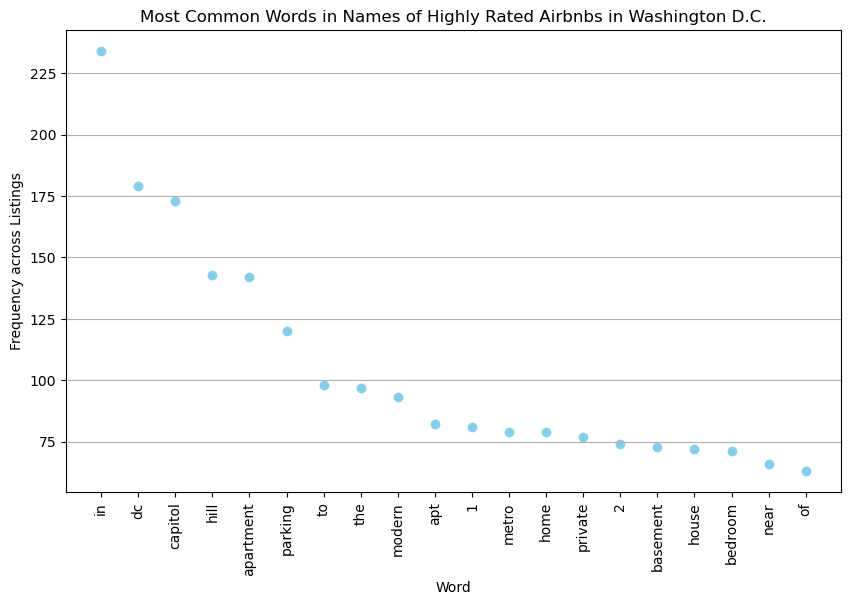

In [348]:
rating_threshold = 4.9
highly_rated_listings_dc = listings_dcfinal[listings_dcfinal['review_scores_rating'] >= rating_threshold]
highly_rated_listings_dc.loc[:, 'name'] = highly_rated_listings_dc['name'].fillna('')
all_names = ' '.join(highly_rated_listings_dc['name'].astype(str))
all_names = all_names.lower()
all_names = re.sub(r'[^\w\s]', '', all_names)
words = all_names.split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words_df = pd.DataFrame(most_common_words, columns = ['word', 'count'])
words_df['word'] = words_df['word'].astype(str)

plt.figure(figsize = (10, 6))
plt.scatter(words_df['word'], words_df['count'], color = 'skyblue')
plt.title('Most Common Words in Names of Highly Rated Airbnbs in Washington D.C.')
plt.xlabel("Word")
plt.ylabel("Frequency across Listings")
plt.xticks(rotation =90)
plt.grid(axis = 'y')